In [5]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline
from pylab import rcParams
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import feature_selection as fs
from sklearn import linear_model
from sklearn import metrics
rcParams['figure.figsize'] = 15, 10
import seaborn as sns
import pylab
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
import itertools

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
def findPercentageRangesEqually(classCount,df):
    percentages = df['percentage']
    percentageArray=[]
    rangeArray=[]
    averageClassCount=len(percentages)/classCount
    averageClassCount=round(averageClassCount)
    
    for i in range(0, len(percentages)):
        percentageArray.append(percentages[i])
    
    
    percentagesArray=np.sort(percentageArray)
    
    
    for i in range(0, len(percentages)):
        if(i%averageClassCount==0):
            rangeArray.append(percentagesArray[i])
    return rangeArray

In [7]:
def makeClassDataFrame(df,classCount,command):
    rangeArray=[]
    if(command=="betweenEqual"):
        rangeArray=findPercentageRangesEqually(classCount,df)
    elif(command=="equallySliced"):
        for i in range(classCount):
            rangeArray.append(i*(1/classCount))
    classArray=[]
    ClassLibrary="ABCDEFGHIJKLMNOPRST"
    for i in range(df.shape[0]):
        for j in range(classCount):
            if(df['percentage'][i]>rangeArray[j]):
                foundClass=ClassLibrary[j]
        classArray.append(foundClass)
    df['ClassLabel']=pd.Series(classArray)
    df2=df.drop(columns=['percentage'])
    return df2

In [8]:
def FeatureSelection(df):
    X = pd.DataFrame(df.iloc[:,:-1])
    y = pd.DataFrame(df.iloc[:,-1])
    y = pd.get_dummies(y)
    model = ExtraTreesClassifier(random_state=1)
    model.fit(X, y)
    # display the relative importance of each attribute
    features = list(X.columns)

    y_pos = np.arange(len(features))

    d={}
    c=0
    for i in features:
        d[i]=model.feature_importances_[c]
        c=c+1
    newd = sorted(d.items(), key=lambda kv: kv[1])
    dd={}
    for i in range(0,23):
        dd[newd[i][0]]=newd[i][1]
    plt.barh(range(len(dd)), list(dd.values()), align='center')
    plt.yticks(range(len(dd)), list(dd.keys()))
    plt.show()
    print(dd)
    return dd


In [9]:
def FeatureSelectionRegression(df):
    import pandas as pd
    X = pd.DataFrame(df.iloc[:,:-1])
    y = pd.DataFrame(df.iloc[:,-1])
    features = list(X.columns)
    f_and_p_test=list()
    f_test, p_test=fs.f_regression(X, y, center=True)
    
    fd={}
    c=0
    for i in features:
        fd[i]=f_test[c]
        c=c+1
    newfd = sorted(fd.items(), key=lambda kv: kv[1])
    fdd={}
    for i in range(0,23):
        fdd[newfd[i][0]]=newfd[i][1]
    plt.barh(range(len(fdd)), list(fdd.values()), align='center')
    plt.yticks(range(len(fdd)), list(fdd.keys()))
    plt.show()
    
    pd={}
    t=0
    for i in features:
        pd[i]=f_test[t]
        t=t+1
    newpd = sorted(pd.items(), key=lambda kv: kv[1])
    pdd={}
    for j in range(0,23):
        pdd[newpd[j][0]]=newpd[j][1]
    plt.barh(range(len(pdd)), list(pdd.values()), align='center')
    plt.yticks(range(len(pdd)), list(pdd.keys()))
    plt.show()
    
    return fdd,pdd
    

In [10]:
def AdaBoost(classCount,csvName,command):
    file = open('adaboosttest'+str(classCount)+'.txt','w')
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,classCount,command)
    dd=FeatureSelection(df)
    keyList=list(dd.keys())
    lines_of_text=[]
    print("ClassCount="+str(classCount)+"\n")
    lines_of_text.append("ClassCount="+str(classCount)+"\n")
    for i in range(0,22):
        droppedColumn=keyList[i]
        df=df.drop(columns=[str(droppedColumn)])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)
        maxAccuracy=0
        lineString=""
        for j in range(1,51):#change range
            estimator=j*100
            clf = AdaBoostClassifier(n_estimators=estimator)
            clf.fit(X_train.values, y_train)
            y_pred = clf.predict(X_test.values)
            accuracy=accuracy_score(y_true, y_pred)
            if(accuracy>maxAccuracy):
                maxAccuracy=accuracy
                lineString="DroppedColumn:"+droppedColumn+" Estimator:" +str(estimator)+" Accuracy:"+str(accuracy)+"\n"
                
        print(lineString)
        file.write(lineString)
        print("ClassCount:"+ str(classCount)+ " Finished:"+droppedColumn)

    file.close() 

In [11]:
def ExtraTrees(classCount,csvName,command):
    file = open('extratreestest'+str(classCount)+'.txt','w')
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,classCount,command)
    dd=FeatureSelection(df)
    keyList=list(dd.keys())
    lines_of_text=[]
    print("ClassCount="+str(classCount)+"\n")
    lines_of_text.append("ClassCount="+str(classCount)+"\n")
    for i in range(0,22):
        droppedColumn=keyList[i]
        df=df.drop(columns=[str(droppedColumn)])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)
        maxAccuracy=0
        lineString=""
        for j in range(1,51):#change range
            estimator=j*100
            clf = ExtraTreesClassifier(n_estimators=estimator, criterion="gini", max_depth=None, bootstrap=True)
            clf.fit(X_train.values, y_train)
            y_pred = clf.predict(X_test.values)
            accuracy=accuracy_score(y_true, y_pred)
            
            if(accuracy>maxAccuracy):
                maxAccuracy=accuracy
                lineString="DroppedColumn:"+droppedColumn+" Estimator:" +str(estimator)+" Accuracy:"+str(accuracy)+"\n"
                
        print(lineString)
        file.write(lineString)
        print("ClassCount:"+ str(classCount)+ " Finished:"+droppedColumn)

    file.close() 

In [12]:
def SVM(classCount,csvName,command):
    file = open('SVM'+str(classCount)+'.txt','w')
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,classCount,command)
    dd=FeatureSelection(df)
    keyList=list(dd.keys())
    lines_of_text=[]
    print("ClassCount="+str(classCount)+"\n")
    lines_of_text.append("ClassCount="+str(classCount)+"\n")
    for i in range(0,22):
        droppedColumn=keyList[i]
        df=df.drop(columns=[str(droppedColumn)])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)
        maxAccuracy=0
        lineString=""
        for j in range(1,51):#change range
            Cnew=j*0.01
            clf = SVC(C = Cnew, kernel='rbf', degree=3, )
            clf.fit(X_train.values, y_train)
            clf.fit(X_train.values, y_train)

            y_pred = clf.predict(X_test.values)

            accuracy=accuracy_score(y_true, y_pred)
            
            if(accuracy>maxAccuracy):
                maxAccuracy=accuracy
                lineString="DroppedColumn:"+droppedColumn+" C:" +str(Cnew)+" Accuracy:"+str(accuracy)+"\n"
                
        print(lineString)
        file.write(lineString)
        print("ClassCount:"+ str(classCount)+ " Finished:"+droppedColumn)

    file.close() 

In [13]:
def SGDRegressor(csvName):
    file = open('SGDRegressorTest'+'.txt','w')
    df = pd.read_csv(csvName)
    df = df.dropna()
    df2=df2.reset_index(drop=True)
    fdd,pdd=FeatureSelectionRegression(df)
    keyList=list(fdd.keys())
    lines_of_text=[]
    print("F Test Commencing\n")
    for i in range(0,22):
        droppedColumn=keyList[i]
        df=df.drop(columns=[str(droppedColumn)])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_true=y_test
        maxAccuracy=0
        lineString=""
        for j in range(1,51):#change range
            estimator=j*100
            clf = linear_model.SGDRegressor()
            clf.fit(X_train.values, y_train)
            y_pred = clf.predict(X_test.values)
            accuracy=metrics.r2_score(y_true, y_pred)
            
            if(accuracy>maxAccuracy):
                maxAccuracy=accuracy
                lineString="DroppedColumn:"+droppedColumn+" Test:F MSE:"+str(accuracy)+"\n"
                
        print(lineString)
        file.write(lineString)
    df = pd.read_csv(csvName)
    df = df.dropna()
    keyList=list(pdd.keys())
    lines_of_text=[]
    print("P Test Commencing\n")
    for i in range(0,22):
        droppedColumn=keyList[i]
        df=df.drop(columns=[str(droppedColumn)])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_true=y_test
        maxAccuracy=0
        lineString=""
        for j in range(1,51):#change range
            estimator=j*100
            clf = linear_model.SGDRegressor()
            clf.fit(X_train.values, y_train)
            y_pred = clf.predict(X_test.values)
            accuracy=metrics.r2_score(y_true, y_pred)
            
            if(accuracy>maxAccuracy):
                maxAccuracy=accuracy
                lineString="DroppedColumn:"+droppedColumn+" Test:P MSE:"+str(accuracy)+"\n"
                
        print(lineString)
        file.write(lineString)

    file.close() 

In [14]:
def NeuralNet(classCount,csvName,command):
    hlayer = list()
    alphalist = [1e-3, 1e-5, 1e-8, 1e-10]
    file = open('neuralnettest_'+ command + '_' + str(classCount) + '_1e-3_denemeeee.txt','w')
    
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,classCount,command)
    dd=FeatureSelection(df)
    keyList=list(dd.keys())
    lines_of_text=[]
    print("ClassCount="+str(classCount)+"\n")
    lines_of_text.append("ClassCount="+str(classCount)+"\n")
    
   # for i in range(1,11):
    #    for j in range(1,11): 
    #        tup = (random.randint(1,21)*25,random.randint(1,21)*5)           
     #       hlayer.append(tup)
    
    for i in range(1,51):
        tup = (25*i,)
        hlayer.append(tup)
        
    for i in range(0,22):
        droppedColumn=keyList[i]
        df=df.drop(columns=[str(droppedColumn)])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)
        maxAccuracy=0
        lineString=""
        
        for j in range(0,len(hlayer)):#change range
            clf = MLPClassifier(solver='lbfgs', alpha=alphalist[0], hidden_layer_sizes=hlayer[j], random_state=1)
            clf.fit(X_train.values, y_train)
            y_pred = clf.predict(X_test.values)
            accuracy=accuracy_score(y_true, y_pred)
            if(accuracy>maxAccuracy):
                maxAccuracy=accuracy
                lineString="DroppedColumn:"+droppedColumn+" HH:" +str(hlayer[j]) + "Alpha:" + str(alphalist[0])+" Accuracy:"+str(accuracy)+"\n"


        print(lineString)
        file.write(lineString)
        print("ClassCount:"+ str(classCount)+ " Finished:"+droppedColumn)

    file.close() 

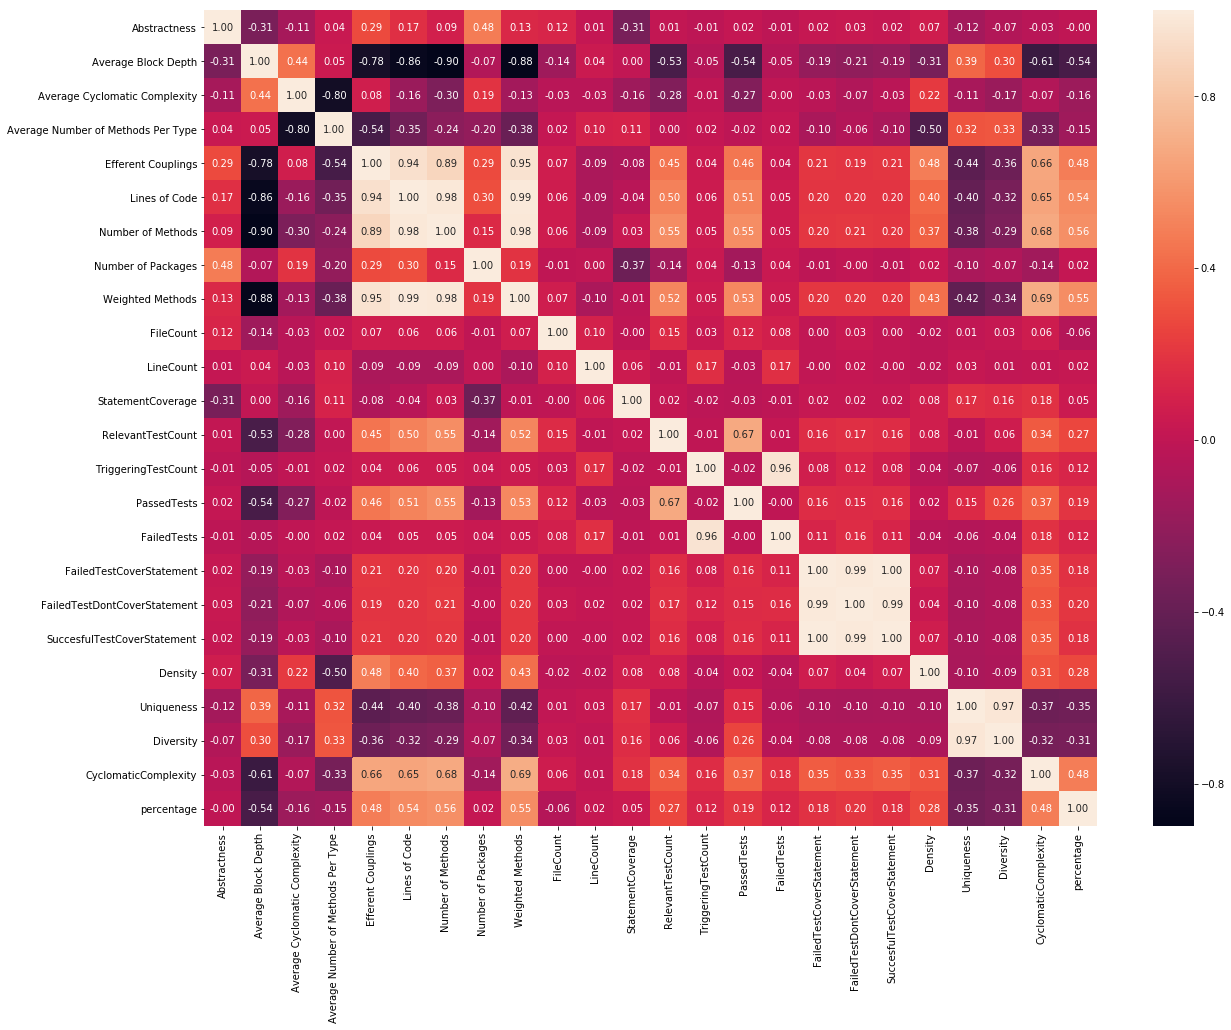

In [14]:
classCount=6
csvName="chart_closure_lang_time_cyclomatic.csv"
df = pd.read_csv(csvName)
df=df.dropna()
sns.heatmap(df.corr(), annot=True, fmt=".2f")


In [15]:
rcParams['figure.figsize'] = (20.0, 15.0)

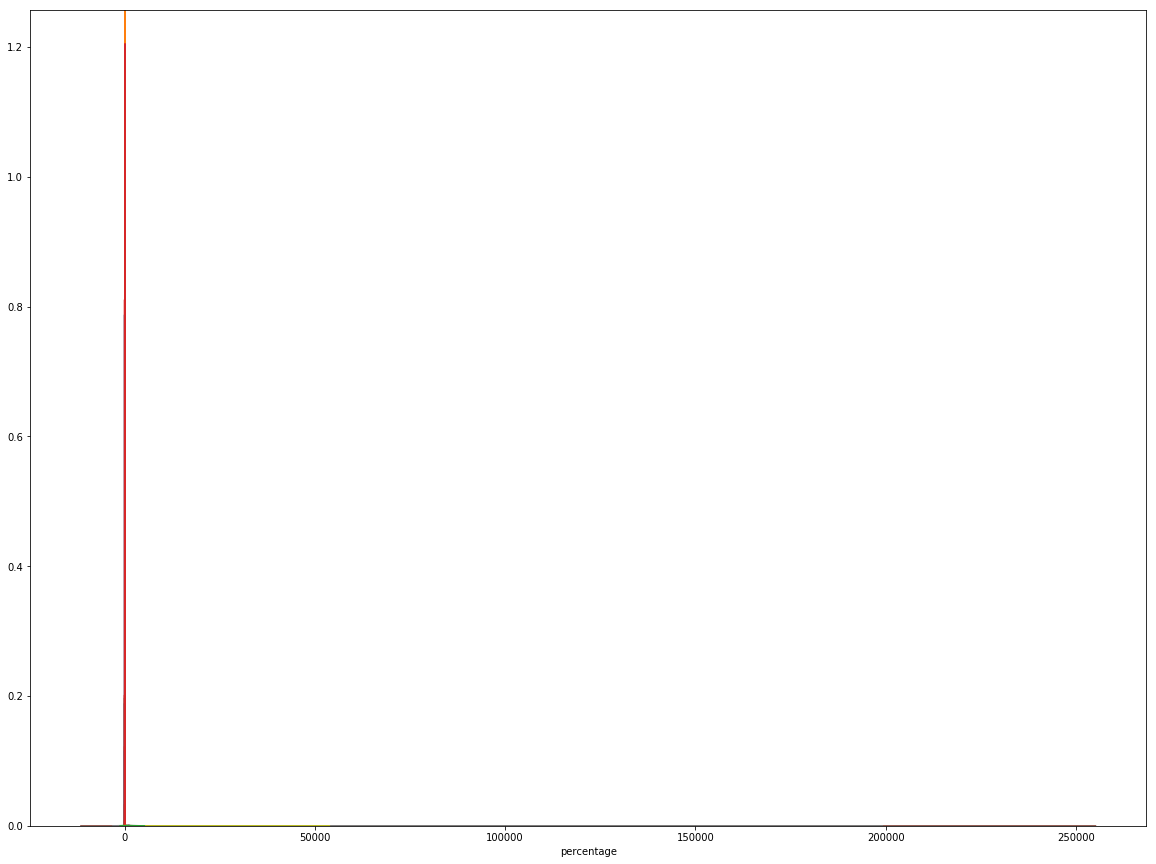

In [15]:
for column in df.columns:
    ax=sns.distplot(df[column])
    plt.pause(0.0001)

Class:2



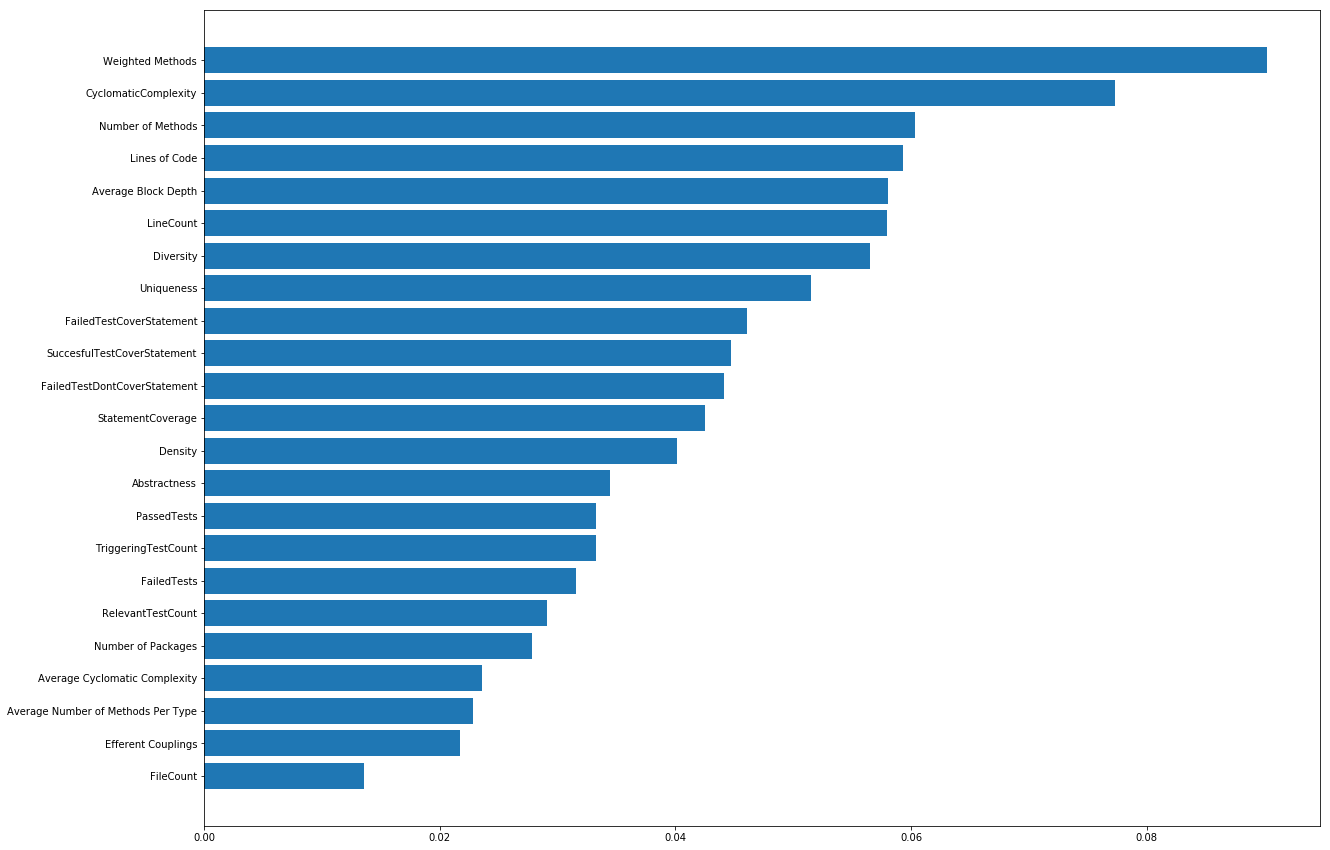

{'FileCount': 0.013579150600182863, 'Efferent Couplings': 0.021679729716169837, 'Average Number of Methods Per Type': 0.022826343012962692, 'Average Cyclomatic Complexity': 0.023608759483296105, 'Number of Packages': 0.027831925216056021, 'RelevantTestCount': 0.029062014272761127, 'FailedTests': 0.031545364499611886, 'TriggeringTestCount': 0.033246513187671321, 'PassedTests': 0.033256106786000737, 'Abstractness': 0.034475332011588269, 'Density': 0.040092472974051607, 'StatementCoverage': 0.042527587859221512, 'FailedTestDontCoverStatement': 0.044142649326788783, 'SuccesfulTestCoverStatement': 0.044676583478732886, 'FailedTestCoverStatement': 0.046086445563940766, 'Uniqueness': 0.051532915434497631, 'Diversity': 0.056556863729518916, 'LineCount': 0.057995151749494989, 'Average Block Depth': 0.058055519424206795, 'Lines of Code': 0.059357933455312664, 'Number of Methods': 0.060357912510724955, 'CyclomaticComplexity': 0.077290675542269829, 'Weighted Methods': 0.090216050164937847}
ClassCo

KeyboardInterrupt: 

In [16]:
command1="equallySliced"
command2="betweenEqual"

for i in range(2,7):
    print("Class:"+str(i)+"\n")
    NeuralNet(i,csvName, command1)
   # AdaBoost(i,csvName,command1)
   # ExtraTrees(i,csvName,command1)
   # SVM(i,csvName,command1)
  
    

In [149]:
csvName="chart_closure_lang_time_cyclomatic.csv"
df2 = pd.read_csv(csvName)
df2 = df2.dropna()
df2=df2.reset_index(drop=True)
df=makeClassDataFrame(df2,2,"equallySliced")
df2 = df2.drop(columns=['FileCount'])

'''
df2 = df2.drop(columns=['Efferent Couplings'])

df2 = df2.drop(columns=['Average Number of Methods Per Type'])
df2 = df2.drop(columns=['Average Cyclomatic Complexity'])
df2 = df2.drop(columns=['Number of Packages'])
df2 = df2.drop(columns=['RelevantTestCount'])
df2 = df2.drop(columns=['FailedTests'])
df2 = df2.drop(columns=['TriggeringTestCount'])
df2 = df2.drop(columns=['PassedTests'])
df2 = df2.drop(columns=['Abstractness'])
df2 = df2.drop(columns=['Density'])
df2 = df2.drop(columns=['StatementCoverage'])
df2 = df2.drop(columns=['FailedTestDontCoverStatement'])
df2 = df2.drop(columns=['SuccesfulTestCoverStatement'])
df2 = df2.drop(columns=['FailedTestCoverStatement'])
df2 = df2.drop(columns=['Uniqueness'])
df2 = df2.drop(columns=['Diversity'])
df2 = df2.drop(columns=['LineCount'])
df2 = df2.drop(columns=['Average Block Depth'])
'''


alphalist = [1e-03, 1e-05, 1e-08, 1e-10]

X = pd.DataFrame(df.iloc[:,:-1])
X = (X - X.mean()) / (X.max() - X.min())
y = pd.DataFrame(df.iloc[:,-1])
y = pd.get_dummies(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
### convert one hot to numbers
y_train = np.argmax(y_train.values, axis=-1)

y_true = np.argmax(y_test.values, axis=-1)
#1e-8, hidden_layer_sizes=(450, 35, 105, 500)
clf = MLPClassifier(solver='lbfgs', alpha=alphalist[2], hidden_layer_sizes=(275,25), random_state=1)
clf.fit(X_train.values, y_train)
y_pred = clf.predict(X_test.values)
accuracy=accuracy_score(y_true, y_pred)

print(accuracy)

0.638888888889


In [161]:
csvName="chart_closure_lang_time_cyclomatic.csv"
command="equallySliced"
classCount=2
tup=(175,40,105)
Alpha=1e-10
df2 = pd.read_csv(csvName)
df2 = df2.dropna()
df2=df2.reset_index(drop=True)
df=makeClassDataFrame(df2,classCount,command)
df=df.drop(columns=['FileCount'])
df=df.drop(columns=['Efferent Couplings'])
df=df.drop(columns=['Average Number of Methods Per Type'])




X = pd.DataFrame(df.iloc[:,:-1])
X = (X - X.mean()) / (X.max() - X.min())
y = pd.DataFrame(df.iloc[:,-1])
y = pd.get_dummies(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    ### convert one hot to numbers
y_train = np.argmax(y_train.values, axis=-1)
y_true = np.argmax(y_test.values, axis=-1)
maxAccuracy=0
clf = MLPClassifier(solver='lbfgs', alpha=Alpha, hidden_layer_sizes=tup, random_state=1)
clf.fit(X_train.values, y_train)
y_pred = clf.predict(X_test.values)
accuracy=accuracy_score(y_true, y_pred)
print(accuracy)

0.888888888889


### Neural Network Model for 1 hidden layer

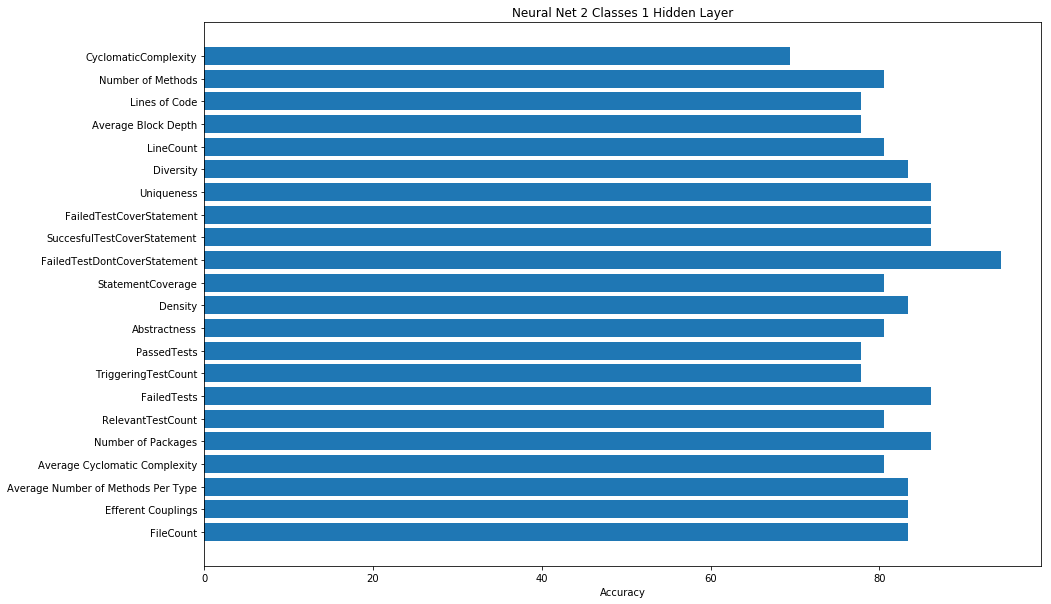

0.944444444444
[[21  1]
 [ 1 13]]


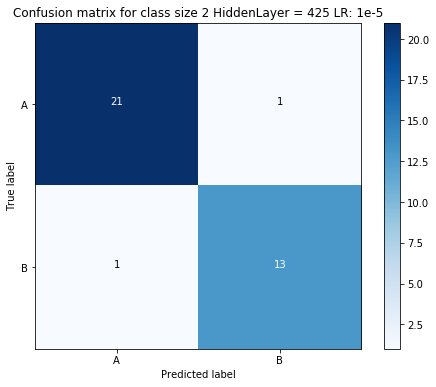

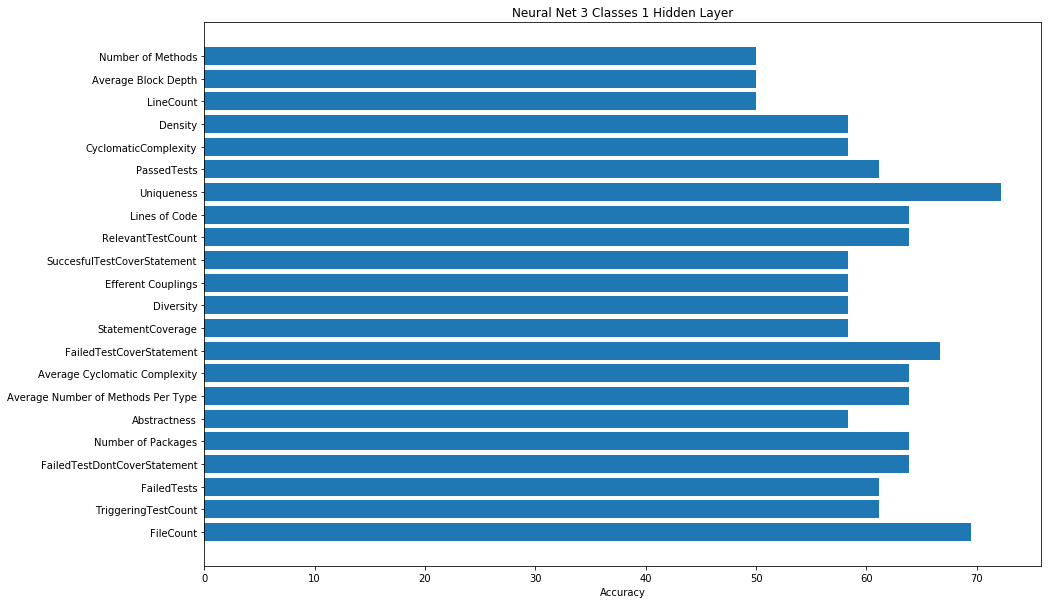

0.722222222222
[[17  0  1]
 [ 3  4  3]
 [ 2  1  5]]


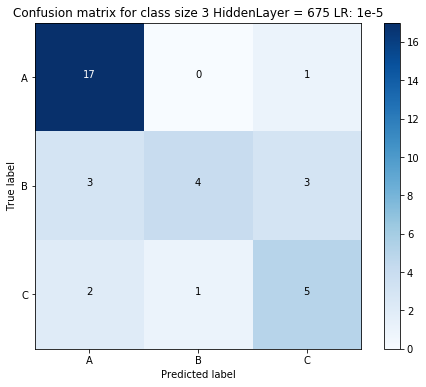

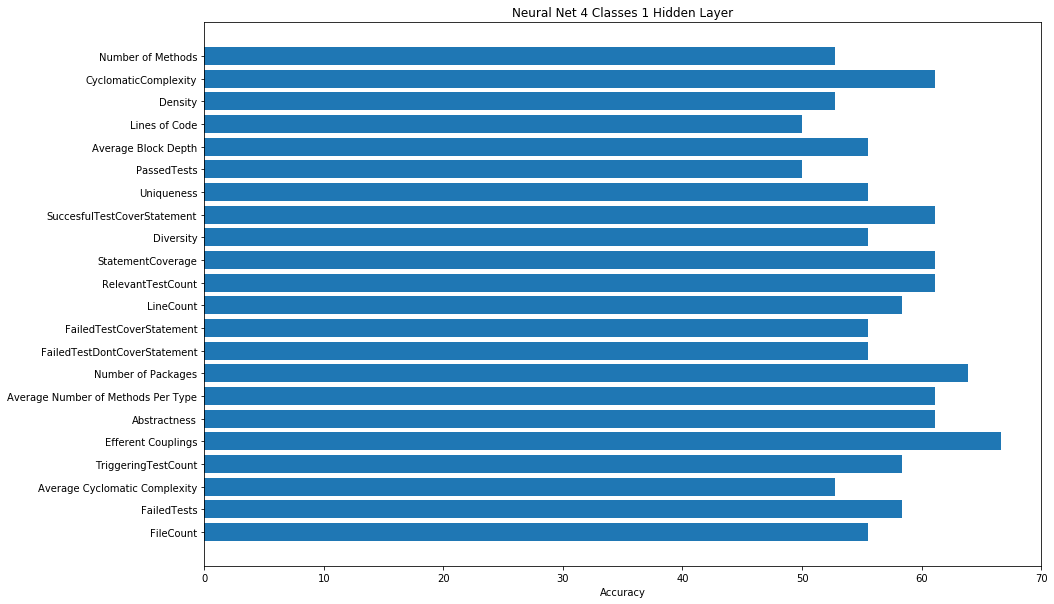

0.666666666667
[[11  0  1  1]
 [ 1  4  3  1]
 [ 1  0  8  1]
 [ 0  3  0  1]]


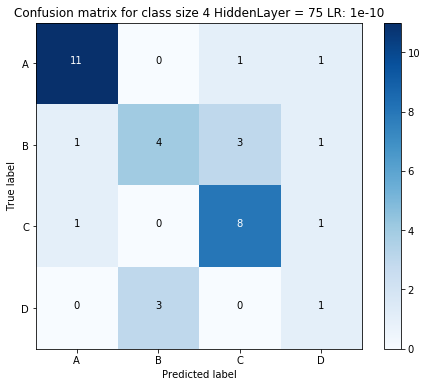

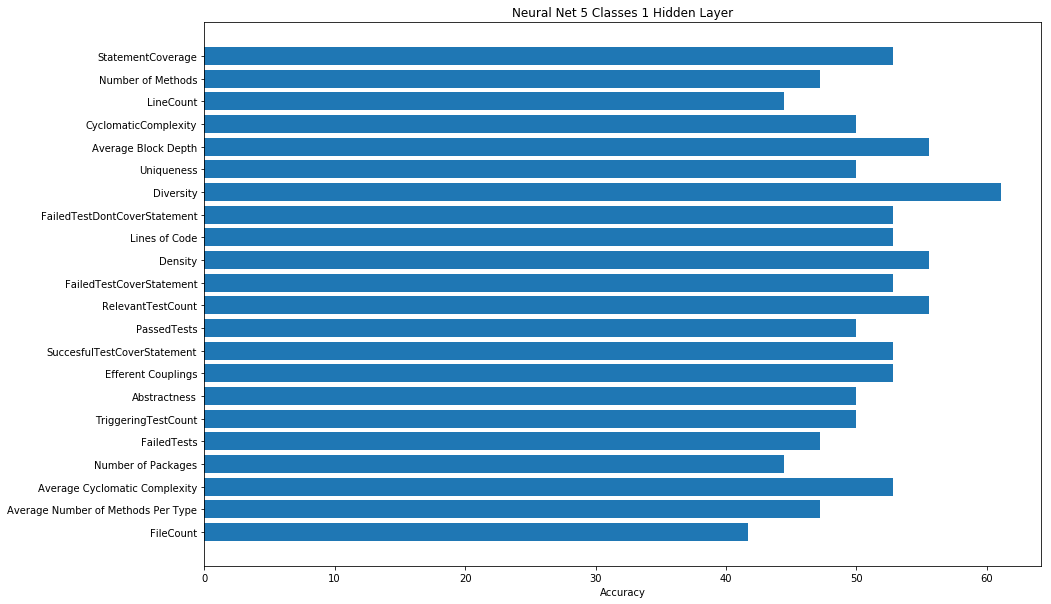

0.611111111111
[[13  0  0  0  0]
 [ 1  3  0  1  0]
 [ 3  1  1  1  1]
 [ 1  1  1  4  0]
 [ 0  1  2  0  1]]


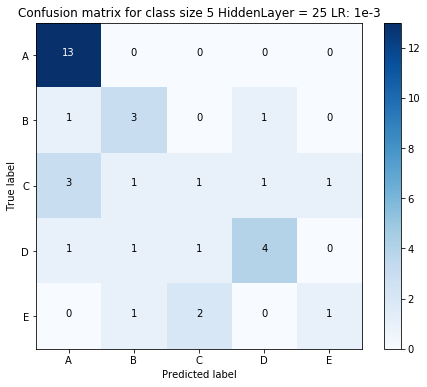

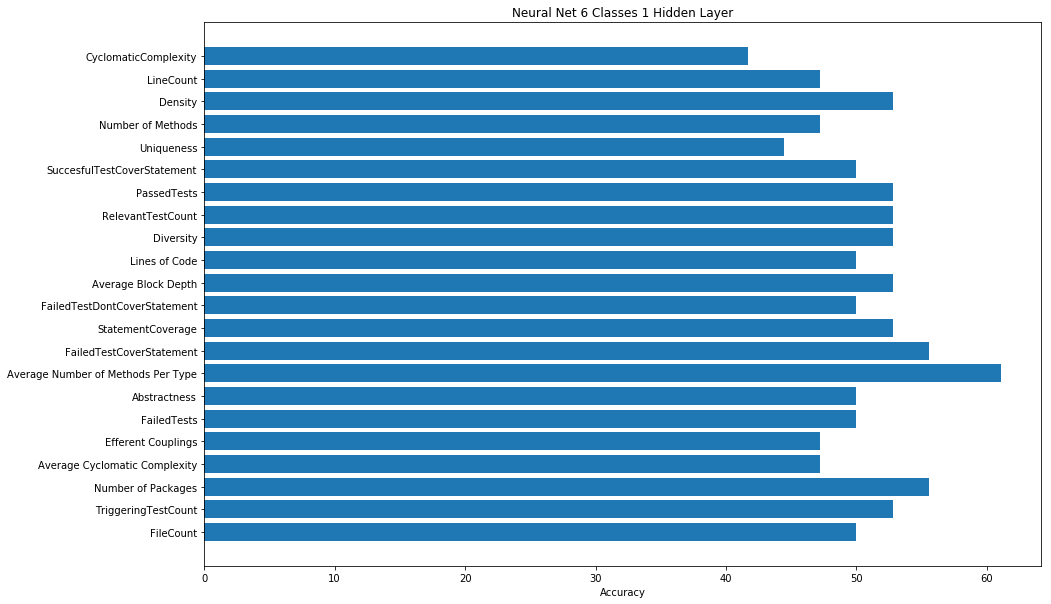

0.611111111111
[[9 2 0 0 1 0]
 [0 4 0 0 0 2]
 [2 0 1 0 0 1]
 [1 0 0 2 1 2]
 [0 0 0 0 5 0]
 [0 1 0 1 0 1]]


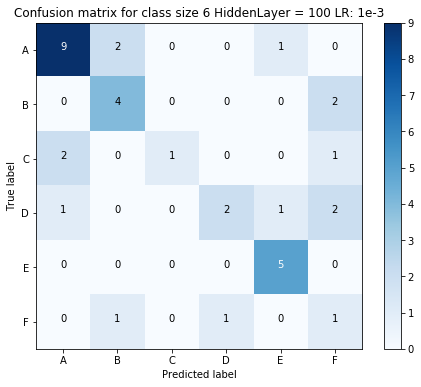

In [52]:
files = ['Equally_Sliced_1e-5/neuralnettestequallySliced_2_1e-5.txt', 'Equally_Sliced_1e-5/neuralnettestequallySliced_3_1e-5.txt',
        'Equally_Sliced_1e-10/neuralnettestequallySliced_4_1e-10.txt', 'Equally_Sliced_1e-3/neuralnettestequallySliced_5_1e-3.txt',
        'Equally_Sliced_1e-3/neuralnettestequallySliced_6_1e-3.txt']



classes = [['A', 'B'],['A', 'B', 'C'], ['A', 'B', 'C', 'D'],['A', 'B', 'C', 'D','E'],['A', 'B', 'C', 'D','E','F']]

for i in range(len(files)):
    acc_list = list()
    metric_list = list()
    hiddenlayer_list = list()
    filename_split = files[i].split("_")
    alpha_val2 = filename_split[4][0:5]
    alpha_val = alpha_val2.replace('.','')
    class_val = filename_split[3]
    with open(files[i]) as file:
        for line in file: 
            if not line.strip(): continue
            line = line.replace('\n','')
            splitted = line.split(":") 
            hlayer = splitted[2][1:4]
            hlayer_val = hlayer.replace(',', '')
            hiddenlayer_list.append(int(hlayer_val))
            split_val = splitted[1].replace('HH', '')
            split_val2 = split_val.strip()
            metric_list.append(split_val2)
            acc_list.append(float(splitted[4])*100)
    #print(acc_list)  
   # print(metric_list)
    max_acc = max(acc_list)
    index = acc_list.index(max_acc)
    #print(metric_list[index])
    #print(hiddenlayer_list[index])

    plt.barh(np.arange(len(metric_list)), acc_list)
    plt.yticks(np.arange(len(metric_list)), metric_list)
    plt.xlabel('Accuracy')
    plt.title('Neural Net ' + str(class_val)+ ' Classes 1 Hidden Layer')
    plt.show()
    
    csvName="chart_closure_lang_time_cyclomatic.csv"
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,int(class_val),"equallySliced")
    i_class_val = int(class_val)


    for i in range(0,index+1):

        df=df.drop(columns=metric_list[i])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)


    clf = MLPClassifier(solver='lbfgs', alpha=float(alpha_val), hidden_layer_sizes=(int(hiddenlayer_list[index]),), random_state=1)
    clf.fit(X_train.values, y_train)
    y_pred = clf.predict(X_test.values)
    accuracy=accuracy_score(y_true, y_pred)

    print(accuracy)

    cnf_matrix = confusion_matrix(y_true, y_pred)
    cmap = plt.get_cmap('Blues')
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    print(cnf_matrix)
    tick_marks = np.arange(len(classes[i_class_val-2]))
    plt.xticks(tick_marks, classes[i_class_val-2])
    plt.yticks(tick_marks, classes[i_class_val-2])
    #plt.matshow(cnf_matrix)
    plt.title('Confusion matrix for class size ' + str(class_val) + ' HiddenLayer = ' + str(hiddenlayer_list[index]) +' LR: ' + str(alpha_val))
    thresh = cnf_matrix.max() / 2
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, format(cnf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


### Neural Net with 2 hidden layers best outcome

94.44444444444444
Average Block Depth


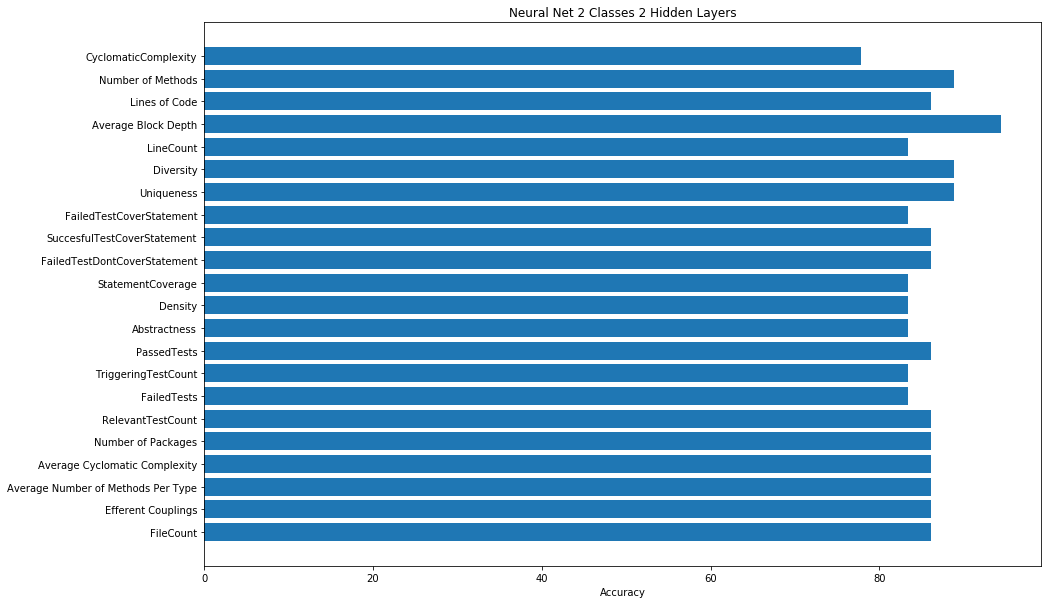

FileCount
Efferent Couplings
Average Number of Methods Per Type
Average Cyclomatic Complexity
Number of Packages
RelevantTestCount
FailedTests
TriggeringTestCount
PassedTests
Abstractness
Density
StatementCoverage
FailedTestDontCoverStatement
SuccesfulTestCoverStatement
FailedTestCoverStatement
Uniqueness
Diversity
LineCount
Average Block Depth
0.861111111111
[[20  2]
 [ 3 11]]


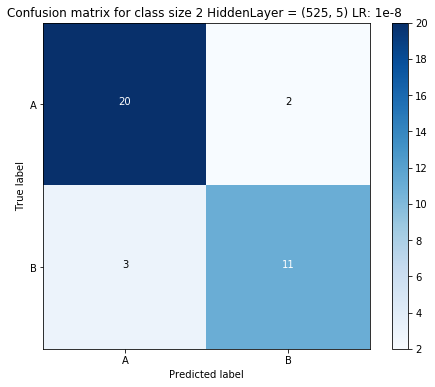

In [78]:
files = ['Equally_Sliced_2Layers/neuralnettest_equallySliced_2.txt']



classes = ['A', 'B']

for i in range(len(files)):
    acc_list = list()
    metric_list = list()
    hiddenlayer_list = list()
    filename_split = files[i].split("_")
    with open(files[i]) as file:
        next(file) 
        for line in file: 
            if not line.strip(): continue       
            line = line.replace('\n','')
            splitted = line.split(":") 
            split_val = splitted[1].replace('HH', '')
            split_val2 = split_val.strip()
            metric_list.append(split_val2)
            acc_list.append(float(splitted[4])*100)
   
    max_acc = max(acc_list)
    print(max_acc)
    index = acc_list.index(max_acc)
    print(metric_list[index])


    plt.barh(np.arange(len(metric_list)), acc_list)
    plt.yticks(np.arange(len(metric_list)), metric_list)
    plt.xlabel('Accuracy')
    plt.title('Neural Net 2 Classes 2 Hidden Layers')
    plt.show()
    
    csvName="chart_closure_lang_time_cyclomatic.csv"
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,2,"equallySliced")



    for i in range(0,index+1):
        print(metric_list[i])
        df=df.drop(columns=metric_list[i])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())

        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)


    clf = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(525, 5), random_state=1)
    clf.fit(X_train.values, y_train)
    y_pred = clf.predict(X_test.values)
    accuracy=accuracy_score(y_true, y_pred)

    print(accuracy)

    cnf_matrix = confusion_matrix(y_true, y_pred)
    cmap = plt.get_cmap('Blues')
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    print(cnf_matrix)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    #plt.matshow(cnf_matrix)H:(525, 5)Alpha:1e-10
    plt.title('Confusion matrix for class size 2 HiddenLayer = (525, 5) LR: 1e-8 ')
    thresh = cnf_matrix.max() / 2
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, format(cnf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()




### Neural Net with 3 hidden layers best outcome

[]
88.88888888888889
Efferent Couplings


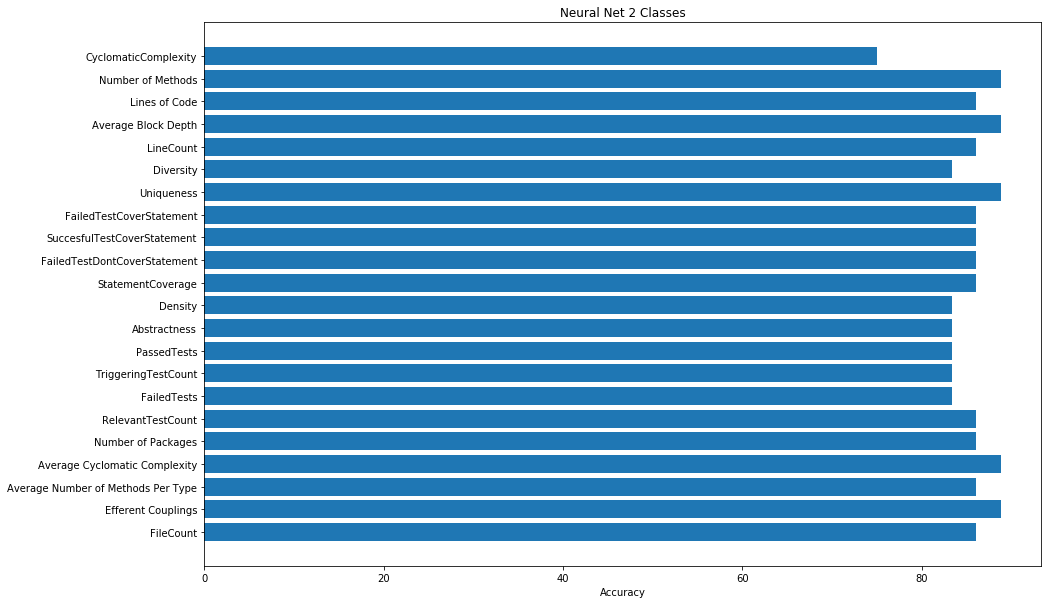

0.888888888889
[[19  3]
 [ 1 13]]


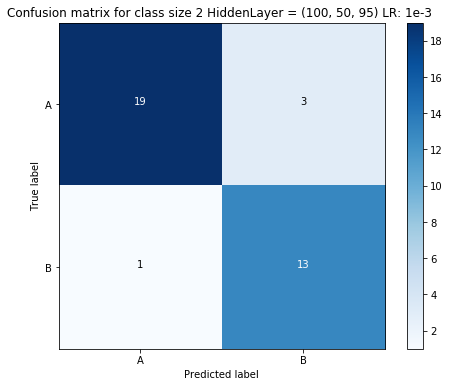

In [51]:
files = ['Equally_Sliced_3Layers/neuralnettest_equallySliced_2.txt']



classes = ['A', 'B']

for i in range(len(files)):

    with open(files[i]) as file:
        next(file) 
        for line in file: 
            if not line.strip(): continue       
            line = line.replace('\n','')
            splitted = line.split(":") 
            hlayer = splitted[2][1:12]
            

            split_val = splitted[1].replace('HH', '')
            split_val2 = split_val.strip()
            metric_list.append(split_val2)
            acc_list.append(float(splitted[4])*100)
    #print(acc_list)  
   # print(metric_list)
    print(hvals_list)
    max_acc = max(acc_list)
    print(max_acc)
    index = acc_list.index(max_acc)
    print(metric_list[index])


    plt.barh(np.arange(len(metric_list)), acc_list)
    plt.yticks(np.arange(len(metric_list)), metric_list)
    plt.xlabel('Accuracy')
    plt.title('Neural Net 2 Classes 3 Hidden Layers')
    plt.show()
    
    csvName="chart_closure_lang_time_cyclomatic.csv"
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,2,"equallySliced")



    for i in range(0,index+1):

        df=df.drop(columns=metric_list[i])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)


    clf = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(100, 50, 95), random_state=1)
    clf.fit(X_train.values, y_train)
    y_pred = clf.predict(X_test.values)
    accuracy=accuracy_score(y_true, y_pred)

    print(accuracy)

    cnf_matrix = confusion_matrix(y_true, y_pred)
    cmap = plt.get_cmap('Blues')
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    print(cnf_matrix)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    #plt.matshow(cnf_matrix)
    plt.title('Confusion matrix for class size 2 HiddenLayer = (100, 50, 95) LR: 1e-3 ')
    thresh = cnf_matrix.max() / 2
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, format(cnf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



### Neural Network 4 Layers Best Outcome

[]
88.88888888888889
FileCount


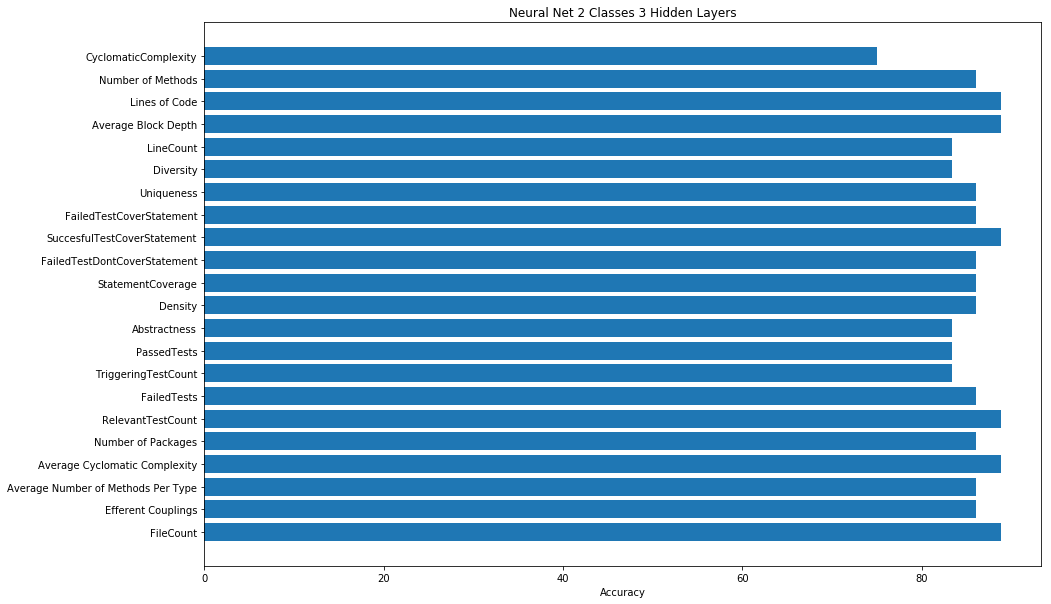

FileCount
0.833333333333
[[17  5]
 [ 1 13]]


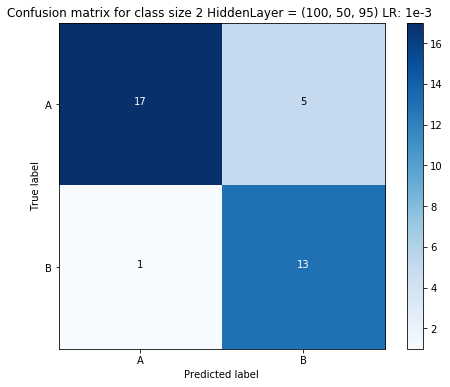

In [141]:
files = ['Equally_Sliced_4_Layers/neuralnettest_equallySliced_2.txt']


acc_list = list()
metric_list = list()

classes = ['A', 'B']


with open('Equally_Sliced_4_Layers/neuralnettest_equallySliced_2.txt') as file:
    next(file)
    for line in file: 
        if not line.strip(): continue       
        line = line.replace('\n','')
        splitted = line.split(":") 
        hlayer = splitted[2][1:12]


        split_val = splitted[1].replace('HH', '')
        split_val2 = split_val.strip()
        metric_list.append(split_val2)
        acc_list.append(float(splitted[4])*100)
#print(acc_list)  
# print(metric_list)
print(hvals_list)
max_acc = max(acc_list)
print(max_acc)
index = acc_list.index(max_acc)
print(metric_list[index])


plt.barh(np.arange(len(metric_list)), acc_list)
plt.yticks(np.arange(len(metric_list)), metric_list)
plt.xlabel('Accuracy')
plt.title('Neural Net 2 Classes 3 Hidden Layers')
plt.show()

csvName="chart_closure_lang_time_cyclomatic.csv"
df2 = pd.read_csv(csvName)
df2 = df2.dropna()
df2=df2.reset_index(drop=True)
df=makeClassDataFrame(df2,2,"equallySliced")



for i in range(0,index+1):
    print(metric_list[i])
    df=df.drop(columns=metric_list[i])
    X = pd.DataFrame(df.iloc[:,:-1])
    X = (X - X.mean()) / (X.max() - X.min())
    y = pd.DataFrame(df.iloc[:,-1])
    y = pd.get_dummies(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    ### convert one hot to numbers
    y_train = np.argmax(y_train.values, axis=-1)

    y_true = np.argmax(y_test.values, axis=-1)


clf = MLPClassifier(solver='lbfgs', alpha=1e-8, hidden_layer_sizes=(450, 35, 105, 500), random_state=1)
clf.fit(X_train.values, y_train)
y_pred = clf.predict(X_test.values)
accuracy=accuracy_score(y_true, y_pred)

print(accuracy)

cnf_matrix = confusion_matrix(y_true, y_pred)
cmap = plt.get_cmap('Blues')
cnf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
print(cnf_matrix)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
#plt.matshow(cnf_matrix)
plt.title('Confusion matrix for class size 2 HiddenLayer = (100, 50, 95) LR: 1e-3 ')
thresh = cnf_matrix.max() / 2
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j]),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



### Neural Network 5 Layers Best Outcome

[]
80.76923076923077
FileCount


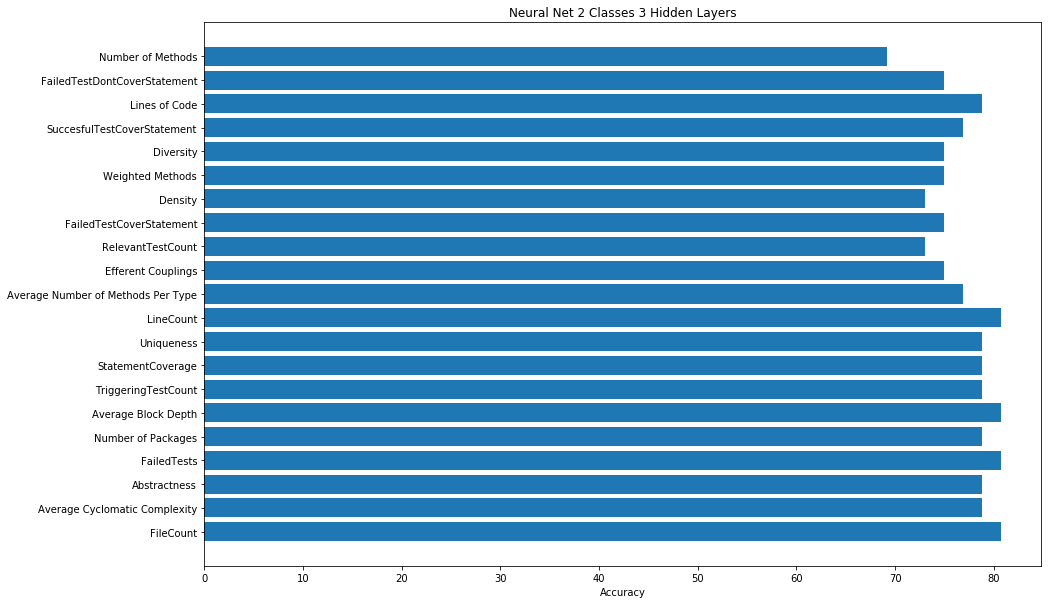

0.777777777778
[[18  4]
 [ 4 10]]


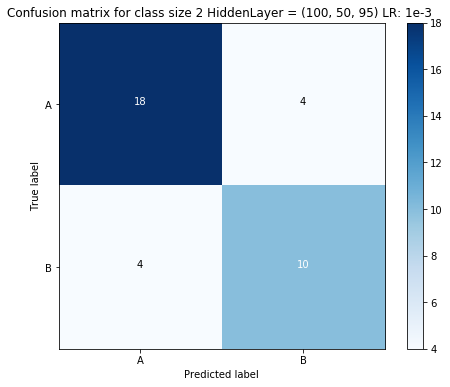

In [93]:
files = ['Equally_Sliced_5Layers/neuralnettest_equallySliced_2.txt']


acc_list = list()
metric_list = list()

classes = ['A', 'B']


with open('Equally_Sliced_5Layers/neuralnettest_equallySliced_2.txt') as file:
    next(file)
    for line in file: 
        if not line.strip(): continue       
        line = line.replace('\n','')
        splitted = line.split(":") 
        hlayer = splitted[2][1:12]


        split_val = splitted[1].replace('HH', '')
        split_val2 = split_val.strip()
        metric_list.append(split_val2)
        acc_list.append(float(splitted[4])*100)
#print(acc_list)  
# print(metric_list)
print(hvals_list)
max_acc = max(acc_list)
print(max_acc)
index = acc_list.index(max_acc)
print(metric_list[index])


plt.barh(np.arange(len(metric_list)), acc_list)
plt.yticks(np.arange(len(metric_list)), metric_list)
plt.xlabel('Accuracy')
plt.title('Neural Net 2 Classes 3 Hidden Layers')
plt.show()

csvName="chart_closure_lang_time_cyclomatic.csv"
df2 = pd.read_csv(csvName)
df2 = df2.dropna()
df2=df2.reset_index(drop=True)
df=makeClassDataFrame(df2,2,"equallySliced")



for i in range(0,index+1):

    df=df.drop(columns=metric_list[i])
    X = pd.DataFrame(df.iloc[:,:-1])
    X = (X - X.mean()) / (X.max() - X.min())
    y = pd.DataFrame(df.iloc[:,-1])
    y = pd.get_dummies(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    ### convert one hot to numbers
    y_train = np.argmax(y_train.values, axis=-1)

    y_true = np.argmax(y_test.values, axis=-1)


clf = MLPClassifier(solver='lbfgs', alpha=1e-8, hidden_layer_sizes=(450, 95, 55, 375, 325), random_state=1)
clf.fit(X_train.values, y_train)
y_pred = clf.predict(X_test.values)
accuracy=accuracy_score(y_true, y_pred)

print(accuracy)

cnf_matrix = confusion_matrix(y_true, y_pred)
cmap = plt.get_cmap('Blues')
cnf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
print(cnf_matrix)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
#plt.matshow(cnf_matrix)
plt.title('Confusion matrix for class size 2 HiddenLayer = (100, 50, 95) LR: 1e-3 ')
thresh = cnf_matrix.max() / 2
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j]),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




### Neural Network 5 Layers with Math Files

[]
88.88888888888889
Number of Packages


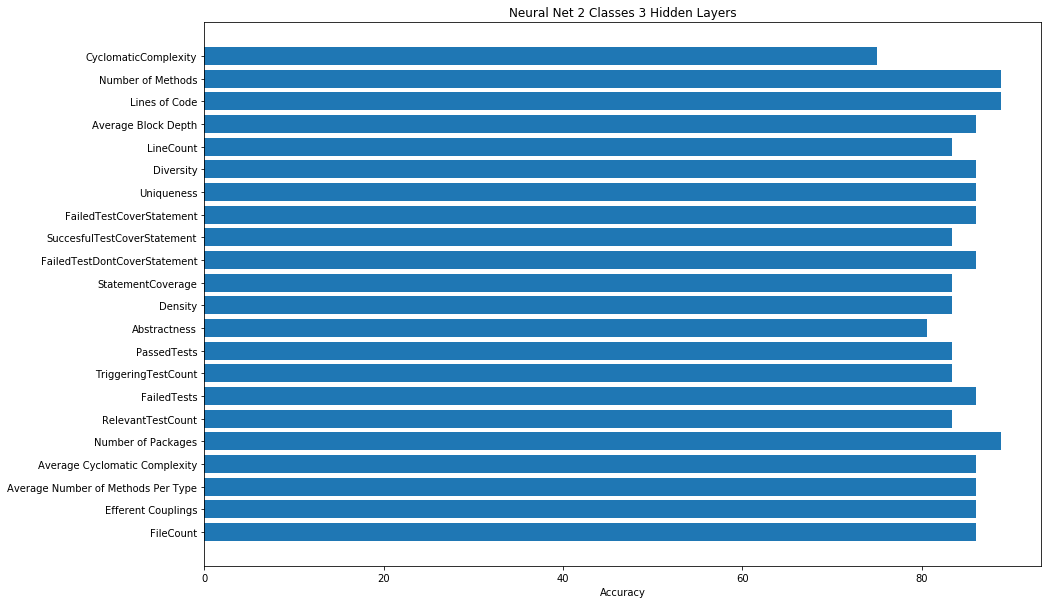

0.769230769231
[[27  6]
 [ 6 13]]


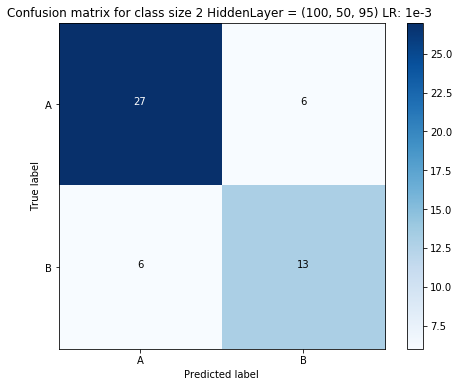

In [95]:
files = ['Equally_Sliced_5Layers_w_math/neuralnettest_equallySliced_2.txt']


acc_list = list()
metric_list = list()

classes = ['A', 'B']


with open('Equally_Sliced_5Layers_w_math/neuralnettest_equallySliced_2.txt') as file:
    next(file)
    for line in file: 
        if not line.strip(): continue       
        line = line.replace('\n','')
        splitted = line.split(":") 
        hlayer = splitted[2][1:12]


        split_val = splitted[1].replace('HH', '')
        split_val2 = split_val.strip()
        metric_list.append(split_val2)
        acc_list.append(float(splitted[4])*100)
#print(acc_list)  
# print(metric_list)
print(hvals_list)
max_acc = max(acc_list)
print(max_acc)
index = acc_list.index(max_acc)
print(metric_list[index])


plt.barh(np.arange(len(metric_list)), acc_list)
plt.yticks(np.arange(len(metric_list)), metric_list)
plt.xlabel('Accuracy')
plt.title('Neural Net 2 Classes 3 Hidden Layers')
plt.show()

csvName="fulldata_wo_cyclomatic.csv"
df2 = pd.read_csv(csvName)
df2 = df2.dropna()
df2=df2.reset_index(drop=True)
df=makeClassDataFrame(df2,2,"equallySliced")



for i in range(0,index+1):

    df=df.drop(columns=metric_list[i])
    X = pd.DataFrame(df.iloc[:,:-1])
    X = (X - X.mean()) / (X.max() - X.min())
    y = pd.DataFrame(df.iloc[:,-1])
    y = pd.get_dummies(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    ### convert one hot to numbers
    y_train = np.argmax(y_train.values, axis=-1)

    y_true = np.argmax(y_test.values, axis=-1)


clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 65, 100, 325, 275), random_state=1)
clf.fit(X_train.values, y_train)
y_pred = clf.predict(X_test.values)
accuracy=accuracy_score(y_true, y_pred)

print(accuracy)

cnf_matrix = confusion_matrix(y_true, y_pred)
cmap = plt.get_cmap('Blues')
cnf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
print(cnf_matrix)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
#plt.matshow(cnf_matrix)
plt.title('Confusion matrix for class size 2 HiddenLayer = (100, 50, 95) LR: 1e-3 ')
thresh = cnf_matrix.max() / 2
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j]),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()





### Adaboost

83.33333333333334
FileCount
700


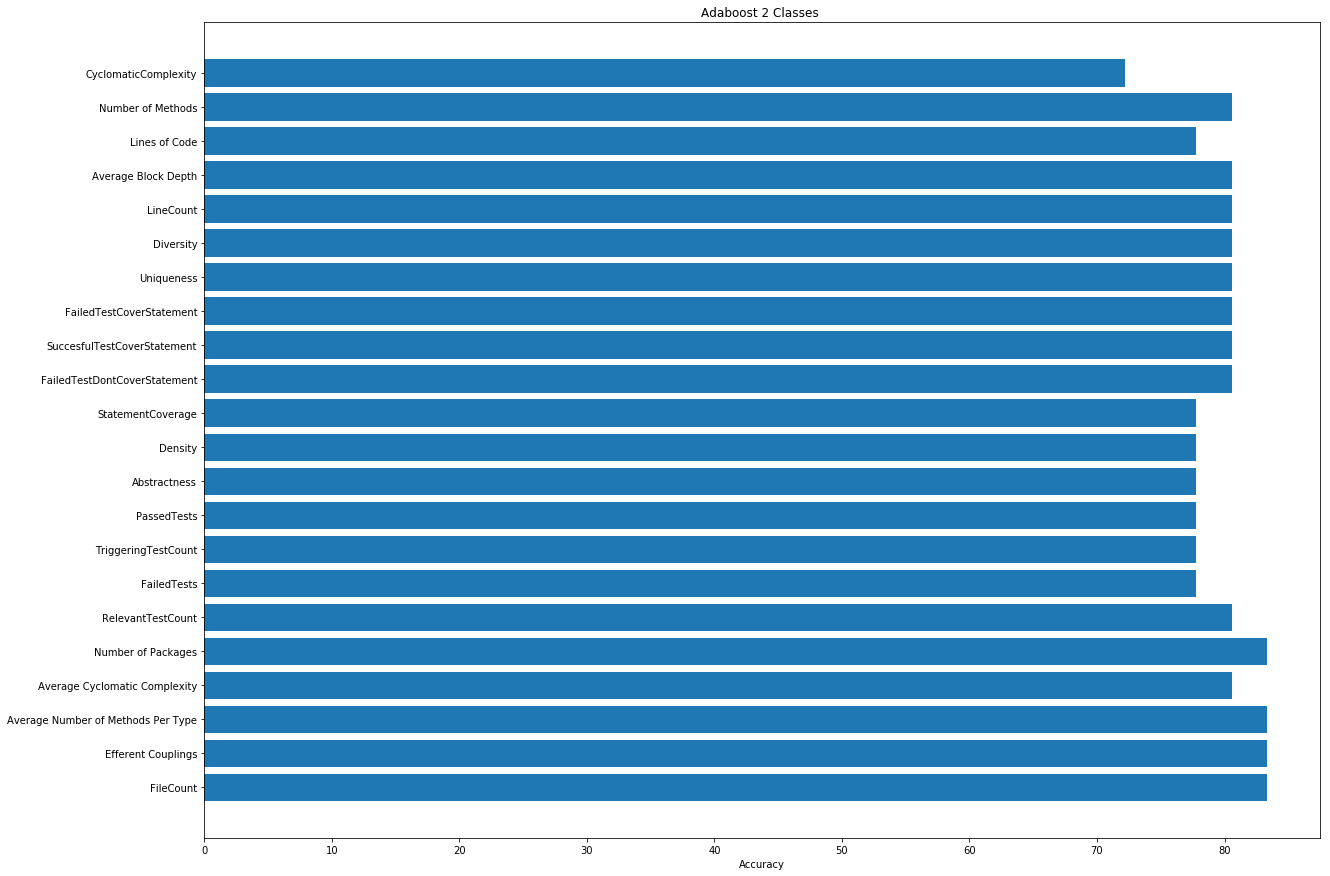

0.8333333333333334
[[17  5]
 [ 1 13]]


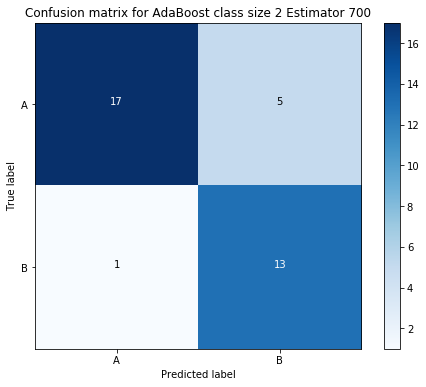

61.111111111111114
FailedTestDontCoverStatement
100


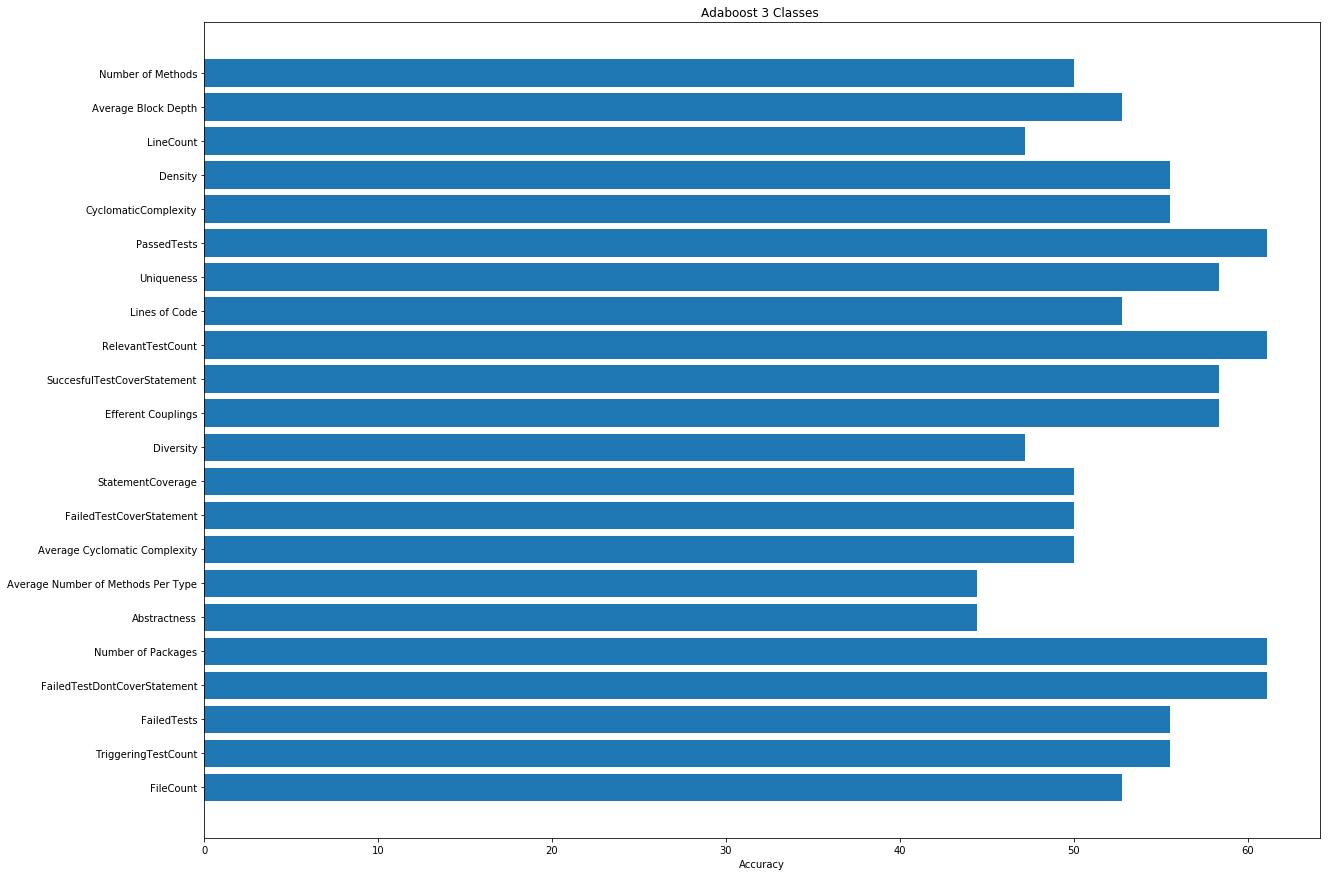

0.6111111111111112
[[13  4  1]
 [ 2  4  4]
 [ 2  1  5]]


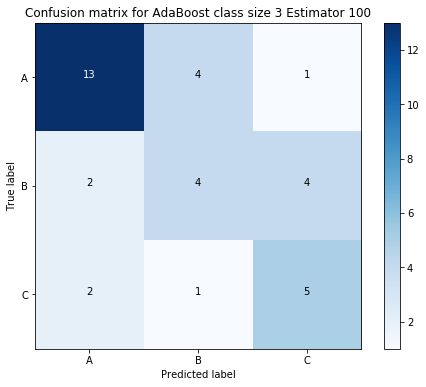

61.111111111111114
FileCount
1800


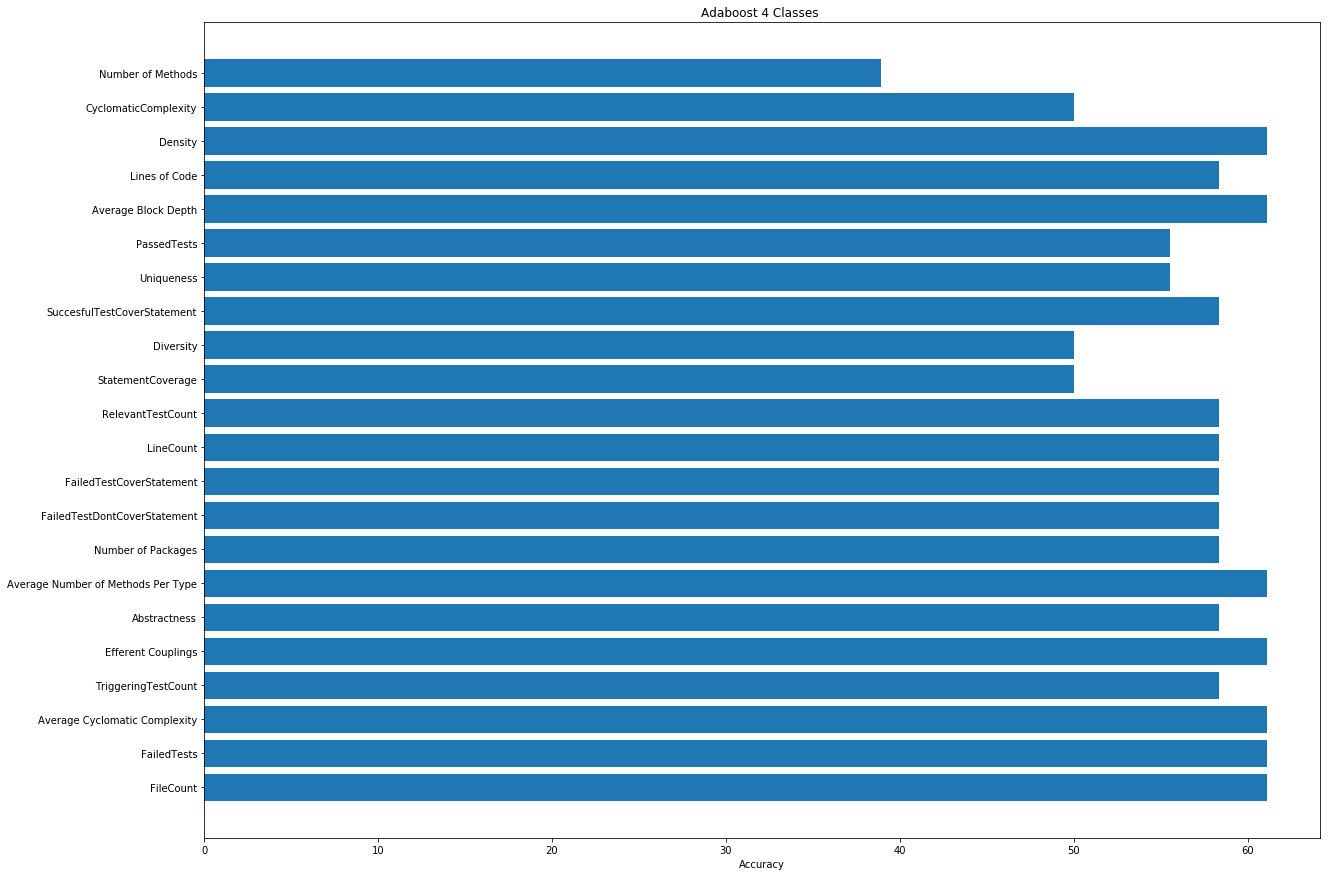

0.5555555555555556
[[13  0  0  0]
 [ 3  4  2  0]
 [ 1  3  1  5]
 [ 0  2  0  2]]


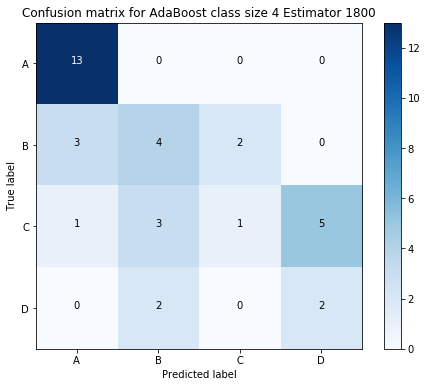

58.333333333333336
FileCount
400


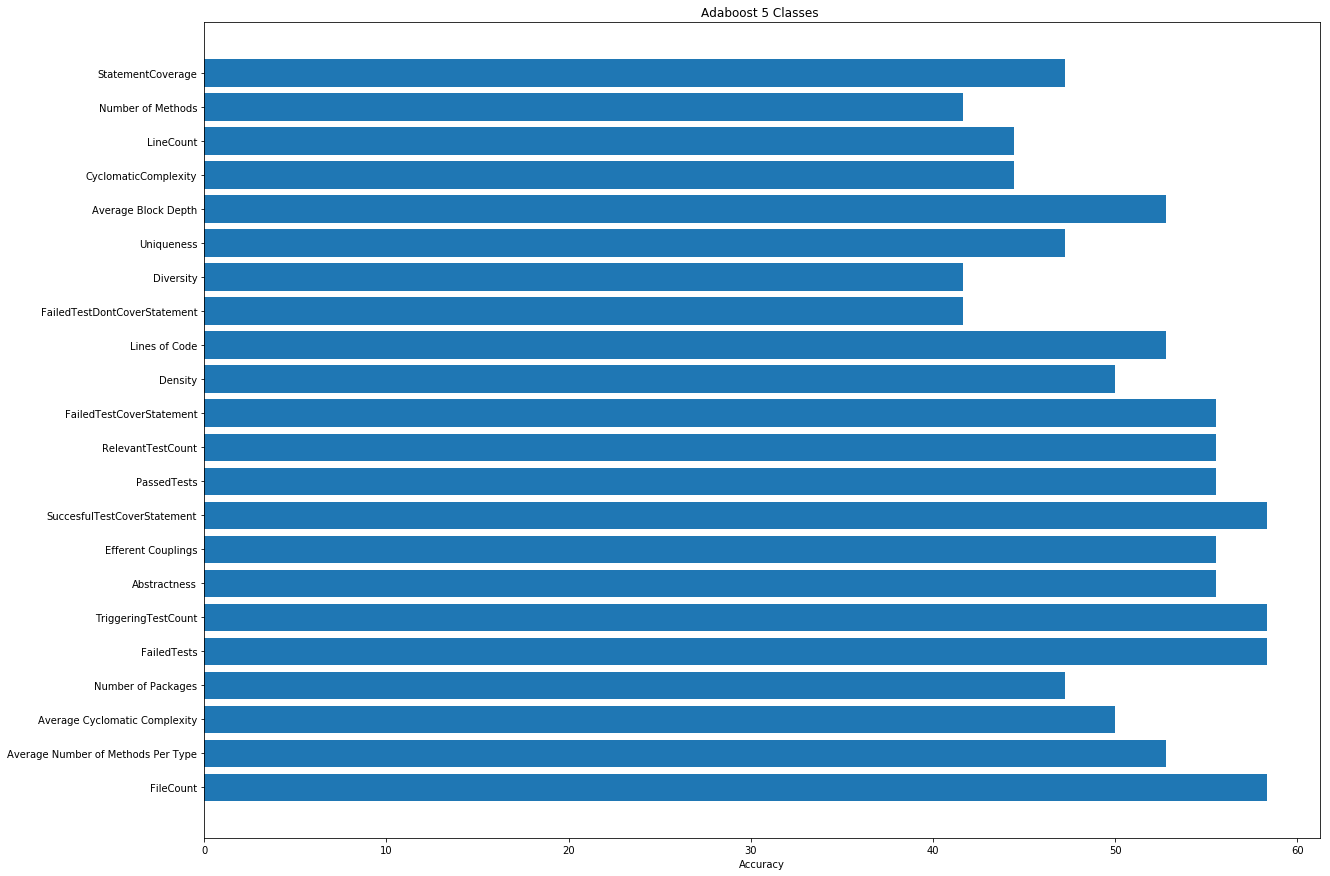

0.5
[[11  2  0  0  0]
 [ 1  3  1  0  0]
 [ 2  2  1  1  1]
 [ 0  1  3  2  1]
 [ 0  2  1  0  1]]


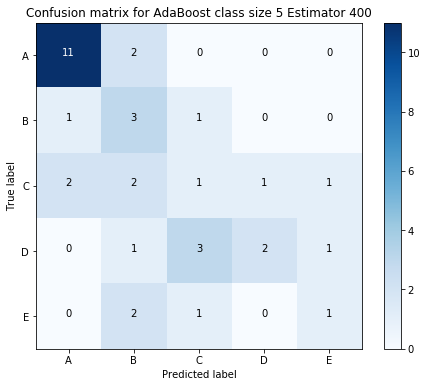

61.111111111111114
FailedTestDontCoverStatement
1600


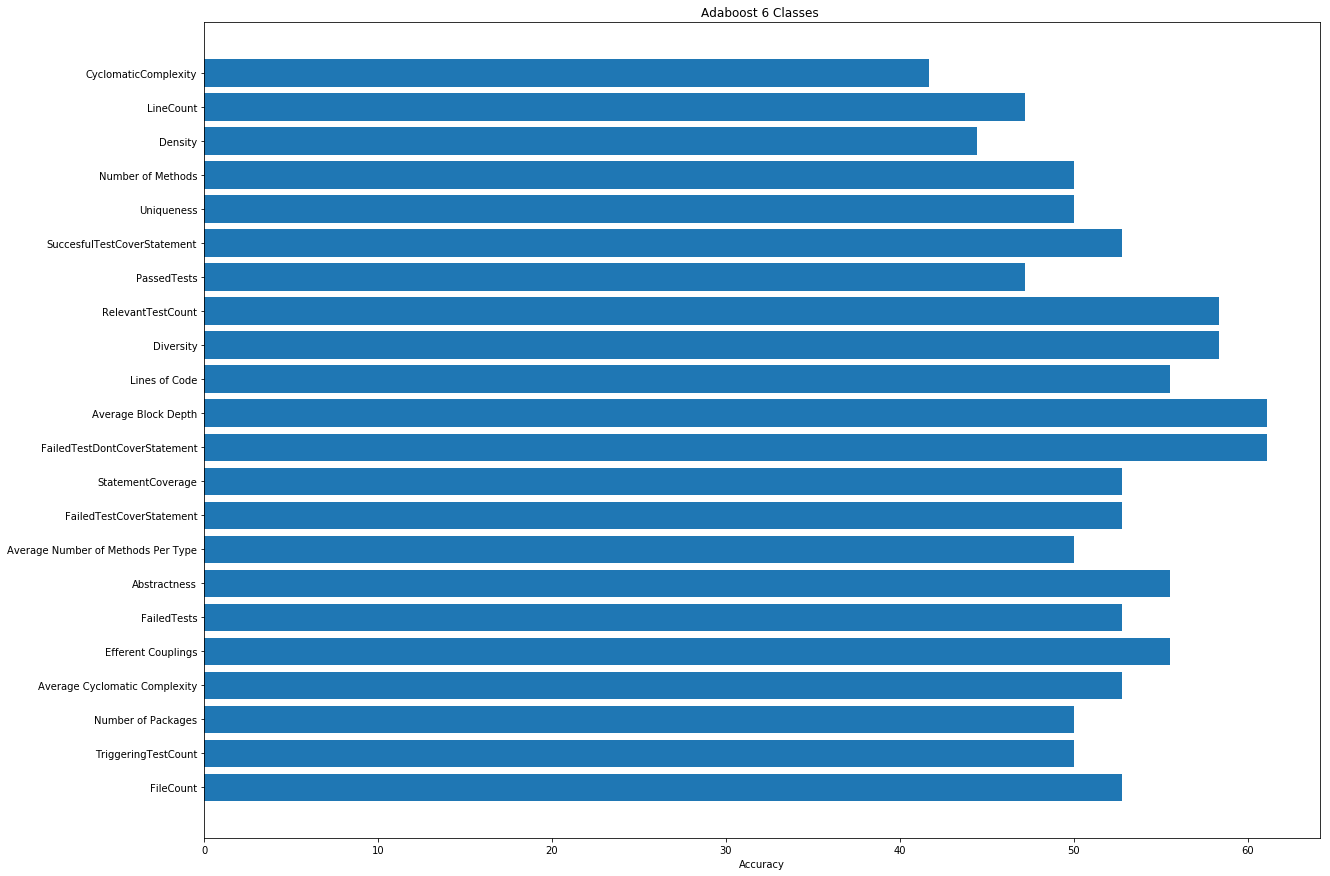

0.5833333333333334
[[11  0  0  0  1  0]
 [ 1  2  1  1  1  0]
 [ 1  1  1  0  1  0]
 [ 0  0  0  5  1  0]
 [ 0  0  1  1  1  2]
 [ 0  2  0  0  0  1]]


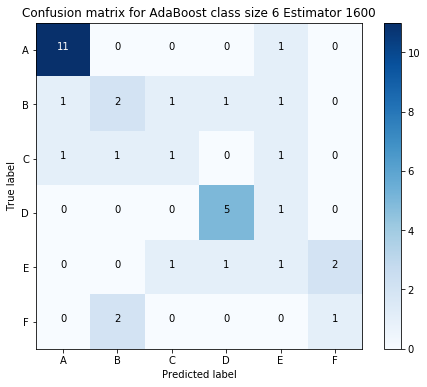

In [18]:
files = ['WithCyclomatic/adaboosttest2.txt','WithCyclomatic/adaboosttest3.txt', 
         'WithCyclomatic/adaboosttest4.txt', 'WithCyclomatic/adaboosttest5.txt', 'WithCyclomatic/adaboosttest6.txt' ]


classes = [['A', 'B'],['A', 'B', 'C'], ['A', 'B', 'C', 'D'],['A', 'B', 'C', 'D','E'],['A', 'B', 'C', 'D','E','F']]

for i in range(len(files)):
    acc_list = list()
    metric_list = list()
    hiddenlayer_list = list()
    est_list = list()
    filename_split = files[i].split("/")
    class_val = filename_split[1][12:13]
 
    with open(files[i]) as file:

        for line in file: 
            if not line.strip(): continue       
            line = line.replace('\n','')
            splitted = line.split(":") 
            est = splitted[2]
            est2 = est.replace('Accuracy','')
            estimator = est2.strip()
            est_list.append(estimator)
            split_val = splitted[1].replace('Estimator', '')
            split_val2 = split_val.strip()
            metric_list.append(split_val2)
            acc_list.append(float(splitted[3])*100)
    #print(acc_list)  
    #print(metric_list)
    #print(est_list)
    max_acc = max(acc_list)
    print(max_acc)
    index = acc_list.index(max_acc)
    print(metric_list[index])
    print(est_list[index])

    plt.barh(np.arange(len(metric_list)), acc_list)
    plt.yticks(np.arange(len(metric_list)), metric_list)
    plt.xlabel('Accuracy')
    plt.title('Adaboost ' + str(class_val) +  ' Classes ')
    plt.show()

    csvName="chart_closure_lang_time_cyclomatic.csv"
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,int(class_val),"equallySliced")



    for i in range(0,index+1):

        df=df.drop(columns=metric_list[i])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)


    clf = AdaBoostClassifier(n_estimators=int(est_list[index]))
    clf.fit(X_train.values, y_train)
    y_pred = clf.predict(X_test.values)
    accuracy=accuracy_score(y_true, y_pred)

    print(accuracy)

    cnf_matrix = confusion_matrix(y_true, y_pred)
    cmap = plt.get_cmap('Blues')
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    print(cnf_matrix)
    tick_marks = np.arange(len(classes[int(class_val)-2]))
    plt.xticks(tick_marks, classes[int(class_val)-2])
    plt.yticks(tick_marks, classes[int(class_val)-2])
    #plt.matshow(cnf_matrix)
    plt.title('Confusion matrix for AdaBoost class size ' + str(class_val) +  ' Estimator ' + str(est_list[index]))
    thresh = cnf_matrix.max() / 2
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, format(cnf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### ExtraTrees

83.33333333333334
Efferent Couplings
100


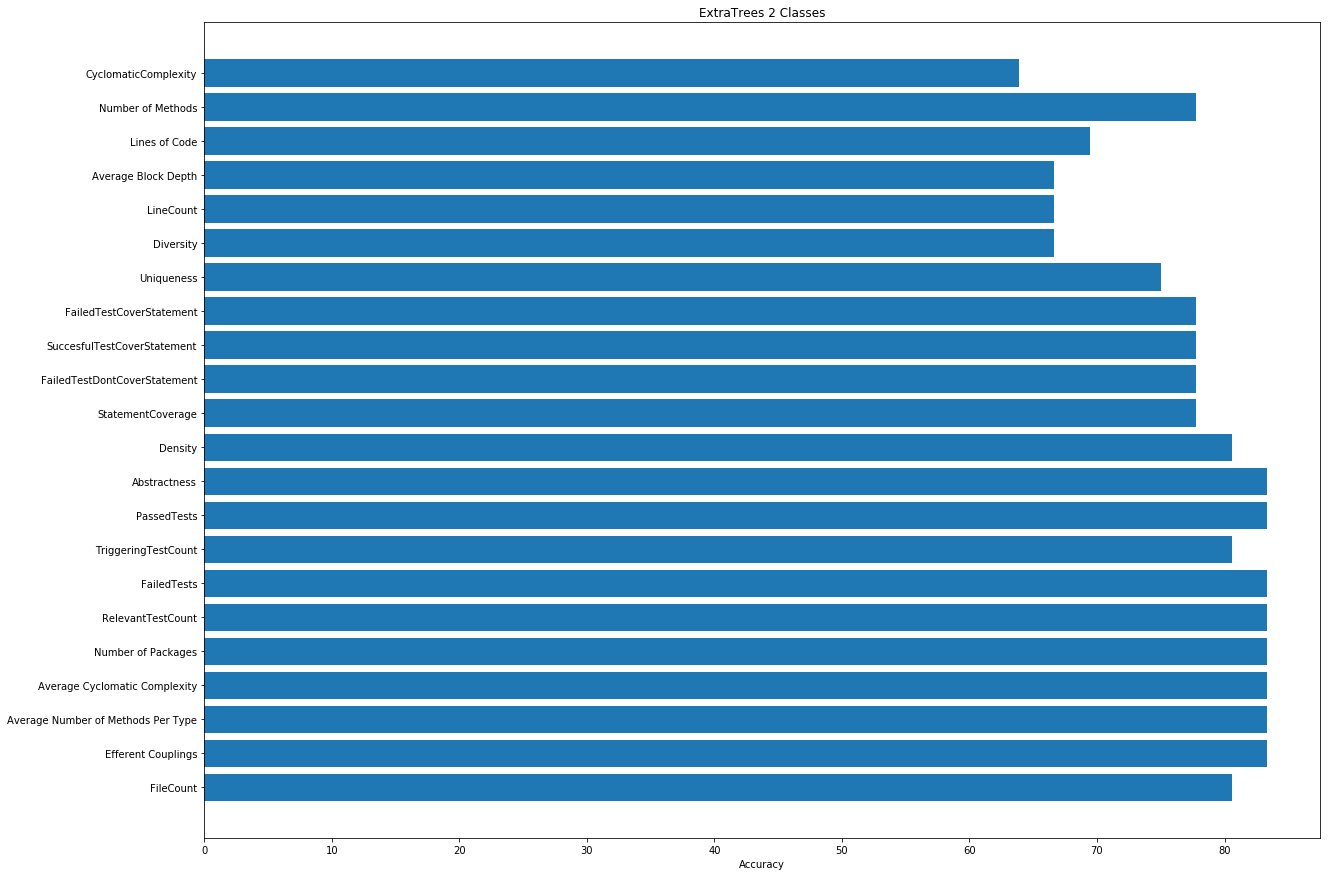

0.8055555555555556
[[20  2]
 [ 5  9]]


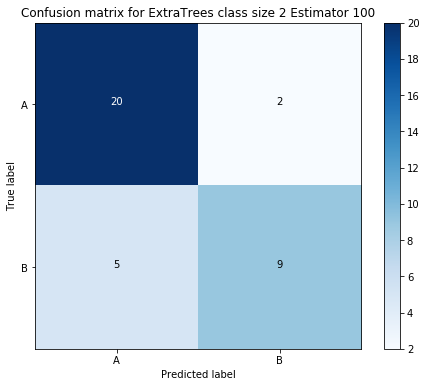

61.111111111111114
Average Cyclomatic Complexity
100


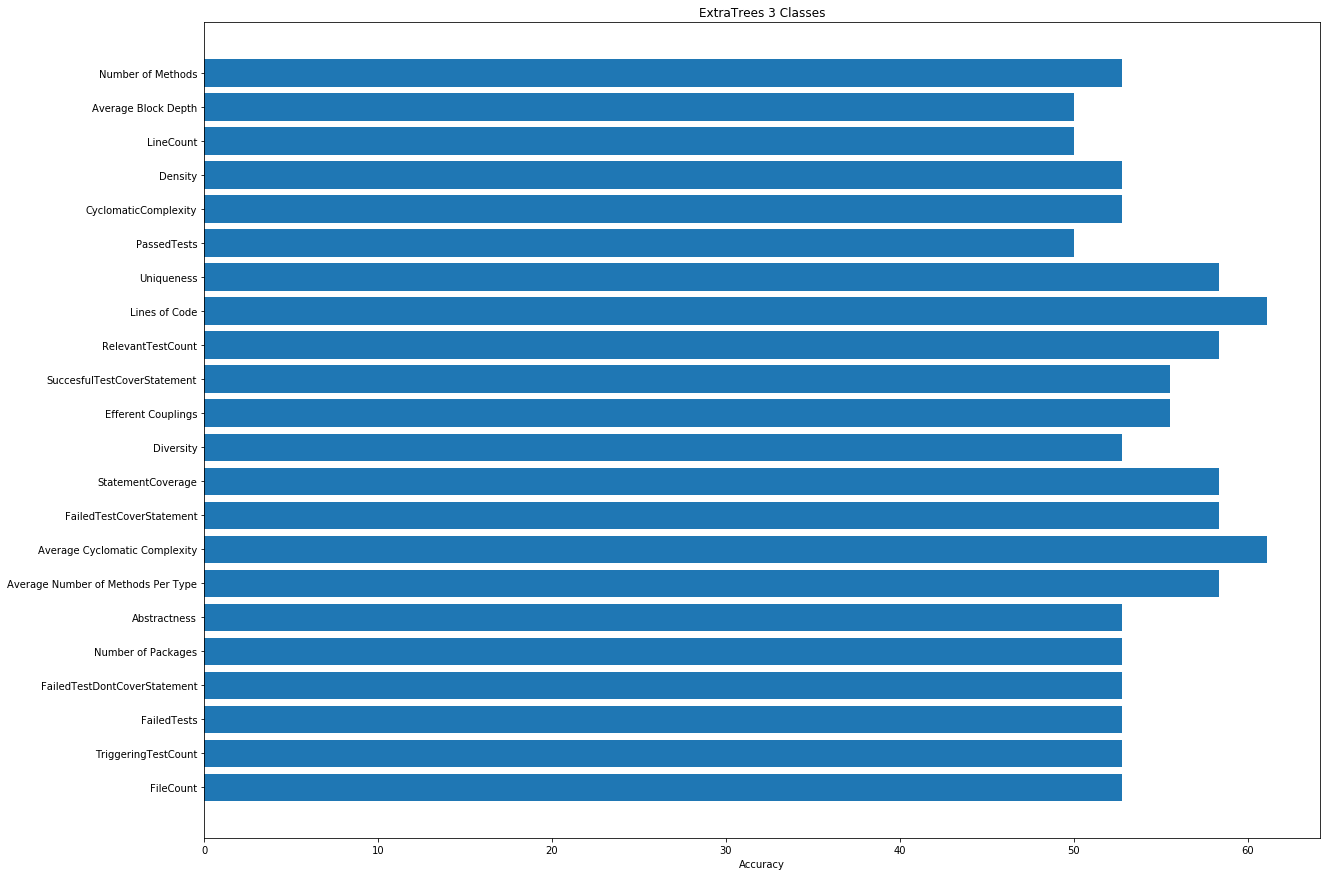

0.5555555555555556
[[14  2  2]
 [ 3  4  3]
 [ 2  4  2]]


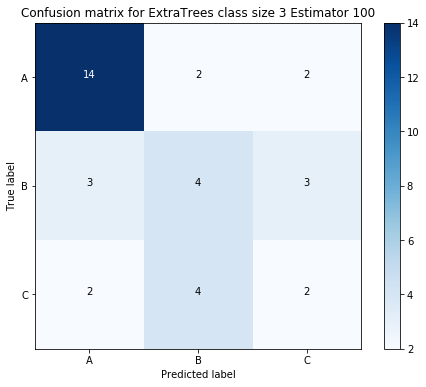

66.66666666666666
Abstractness
1700


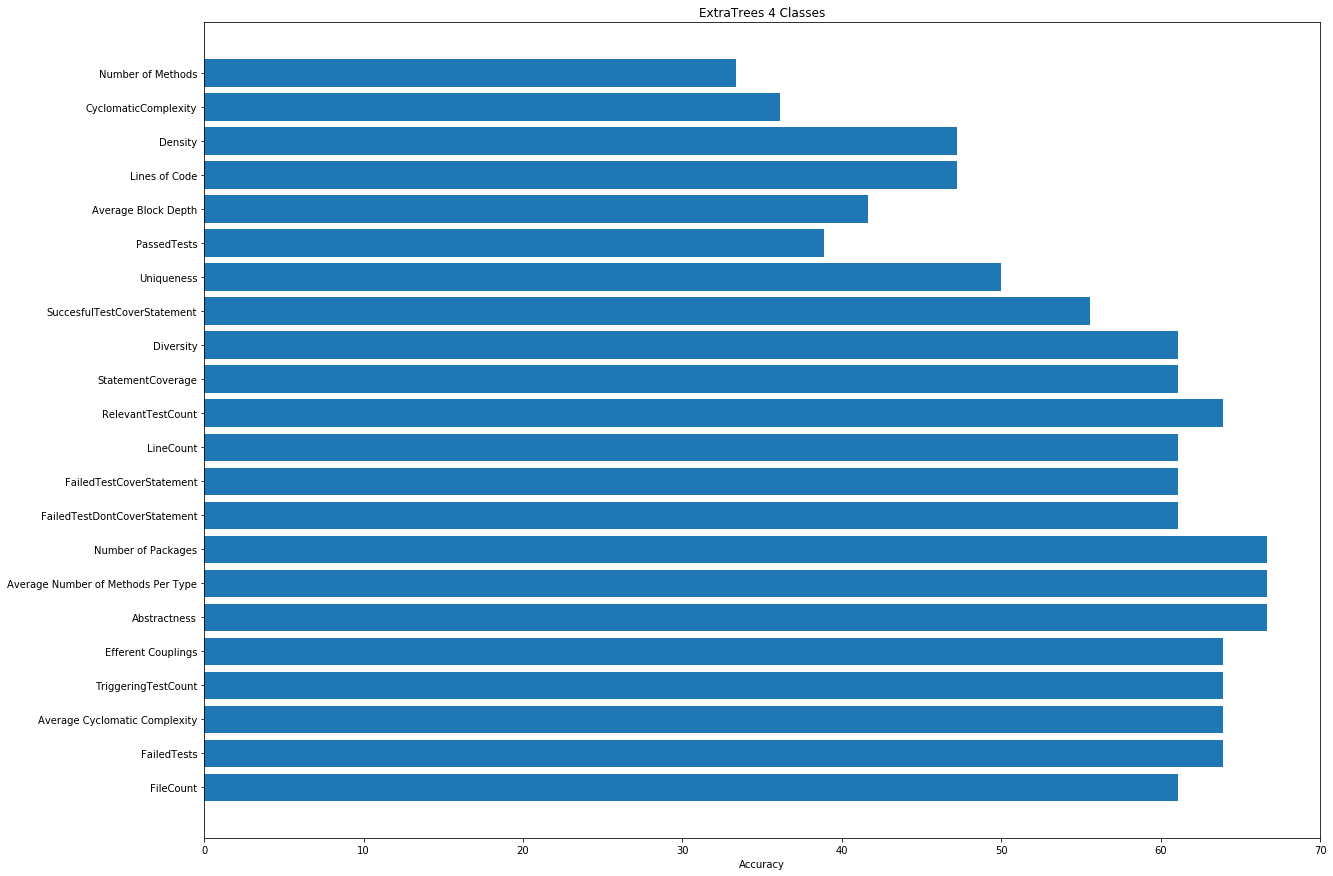

0.6111111111111112
[[13  0  0  0]
 [ 3  3  2  1]
 [ 2  2  4  2]
 [ 0  2  0  2]]


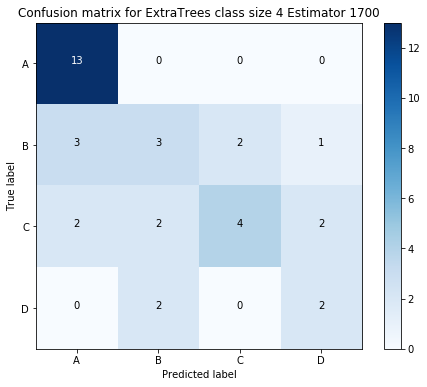

63.888888888888886
RelevantTestCount
1300


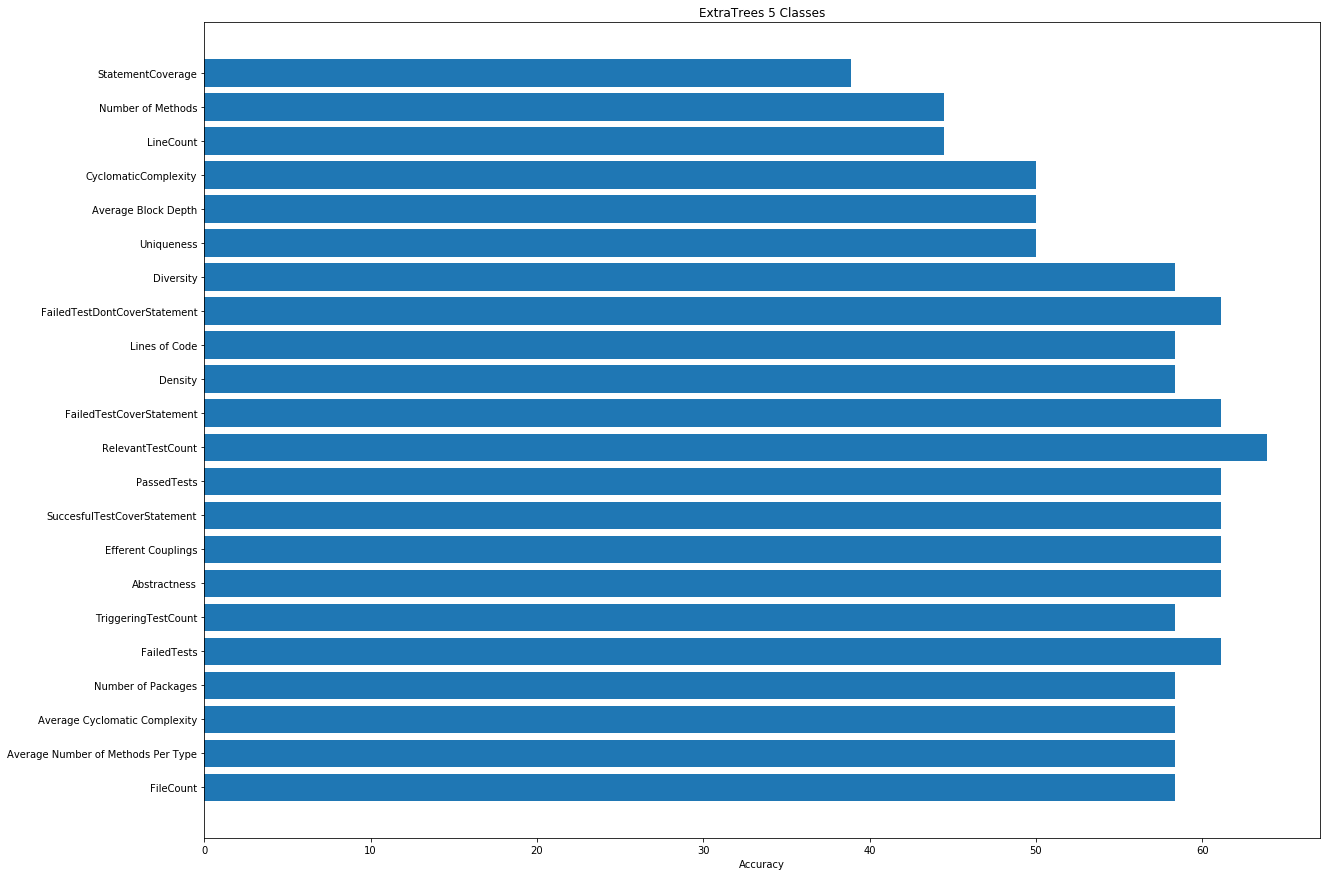

0.6111111111111112
[[13  0  0  0  0]
 [ 1  3  1  0  0]
 [ 3  0  1  3  0]
 [ 1  0  2  4  0]
 [ 0  1  2  0  1]]


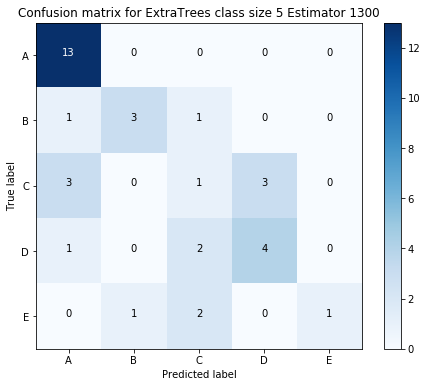

63.888888888888886
FailedTestCoverStatement
100


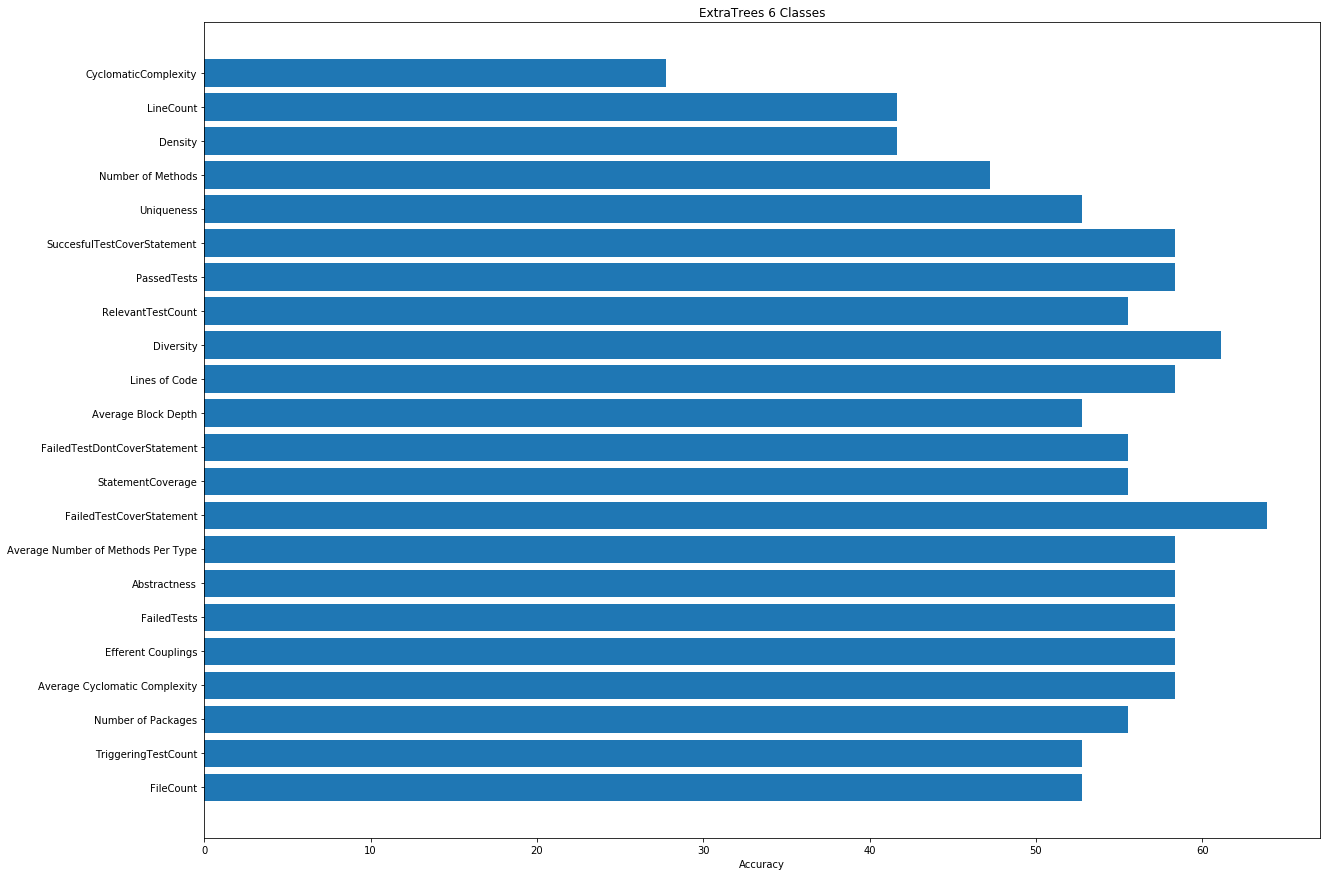

0.5555555555555556
[[11  0  0  0  1  0]
 [ 1  3  2  0  0  0]
 [ 2  0  1  0  0  1]
 [ 1  1  0  2  2  0]
 [ 1  0  1  0  2  1]
 [ 0  2  0  0  0  1]]


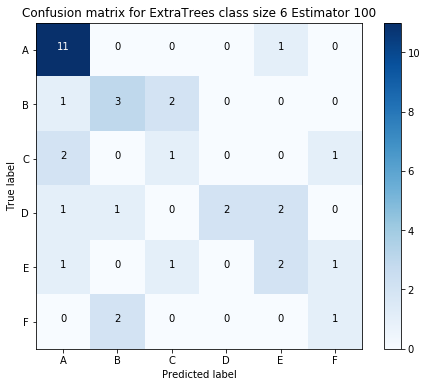

In [15]:


files = ['WithCyclomatic/extratreestest2.txt','WithCyclomatic/extratreestest3.txt', 
         'WithCyclomatic/extratreestest4.txt', 'WithCyclomatic/extratreestest5.txt', 'WithCyclomatic/extratreestest6.txt' ]


classes = [['A', 'B'],['A', 'B', 'C'], ['A', 'B', 'C', 'D'],['A', 'B', 'C', 'D','E'],['A', 'B', 'C', 'D','E','F']]

for i in range(len(files)):
    acc_list = list()
    metric_list = list()
    hiddenlayer_list = list()
    est_list = list()
    filename_split = files[i].split("/")
    class_val = filename_split[1][14:15]
    with open(files[i]) as file:

        for line in file: 
            if not line.strip(): continue       
            line = line.replace('\n','')
            splitted = line.split(":") 
            est = splitted[2]
            est2 = est.replace('Accuracy','')
            estimator = est2.strip()
            est_list.append(estimator)
            split_val = splitted[1].replace('Estimator', '')
            split_val2 = split_val.strip()
            metric_list.append(split_val2)
            acc_list.append(float(splitted[3])*100)
    #print(acc_list)  
    #print(metric_list)
    #print(est_list)
    max_acc = max(acc_list)
    print(max_acc)
    index = acc_list.index(max_acc)
    print(metric_list[index])
    print(est_list[index])

    plt.barh(np.arange(len(metric_list)), acc_list)
    plt.yticks(np.arange(len(metric_list)), metric_list)
    plt.xlabel('Accuracy')
    plt.title('ExtraTrees ' + str(class_val) + ' Classes')
    plt.show()

    csvName="chart_closure_lang_time_cyclomatic.csv"
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,int(class_val),"equallySliced")



    for i in range(0,index+1):

        df=df.drop(columns=metric_list[i])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)


    clf = ExtraTreesClassifier(n_estimators=int(est_list[index]), criterion="gini", max_depth=None, bootstrap=True)
    clf.fit(X_train.values, y_train)
    y_pred = clf.predict(X_test.values)
    accuracy=accuracy_score(y_true, y_pred)

    print(accuracy)

    cnf_matrix = confusion_matrix(y_true, y_pred)
    cmap = plt.get_cmap('Blues')
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    print(cnf_matrix)
    tick_marks = np.arange(len(classes[int(class_val)-2]))
    plt.xticks(tick_marks, classes[int(class_val)-2])
    plt.yticks(tick_marks, classes[int(class_val)-2])
    #plt.matshow(cnf_matrix)
    plt.title('Confusion matrix for ExtraTrees class size ' + str(class_val) +  ' Estimator ' + str(est_list[index]))
    thresh = cnf_matrix.max() / 2
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, format(cnf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### SVM

2
80.55555555555556
Number of Methods
0.33


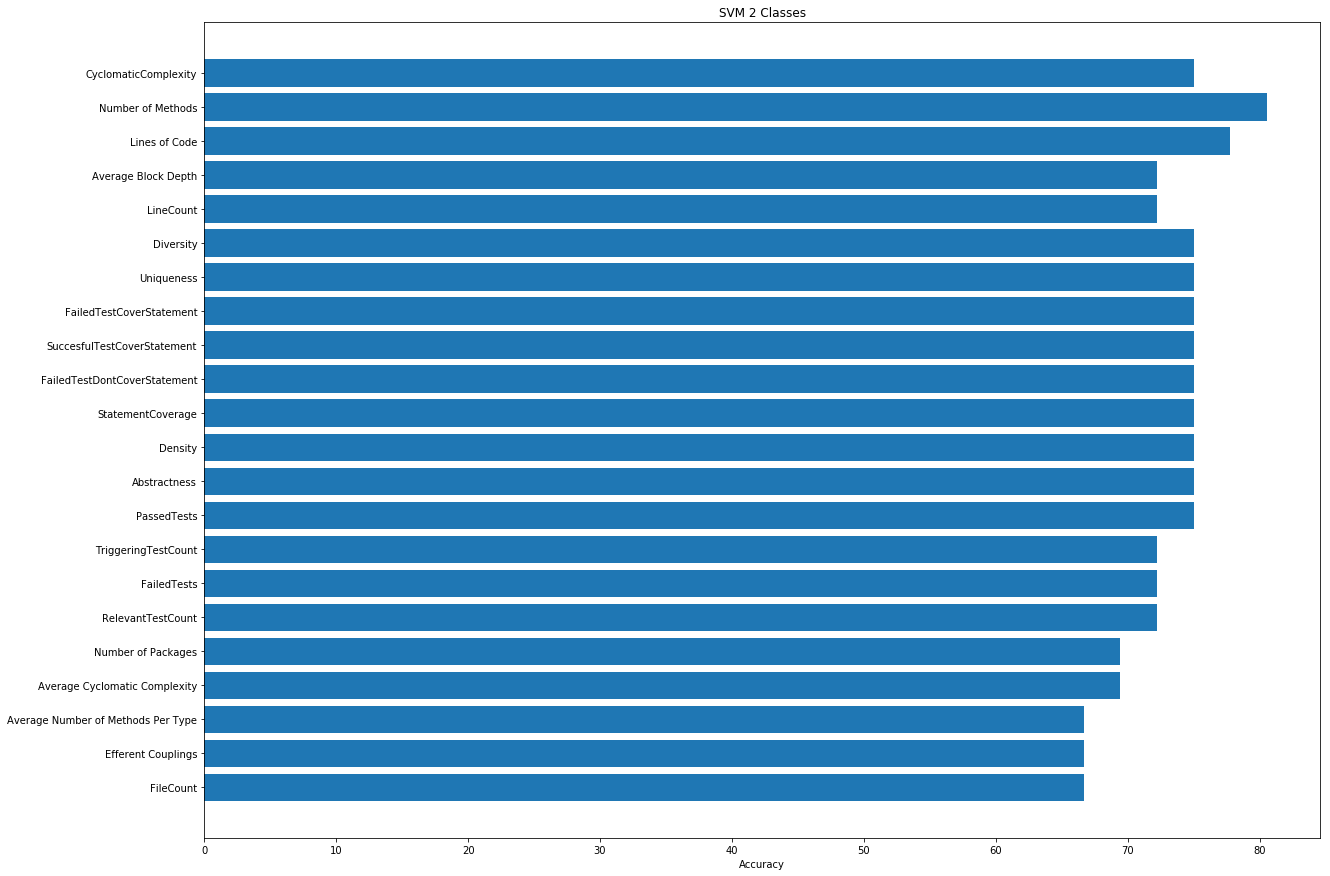

0.8055555555555556
[[21  1]
 [ 6  8]]


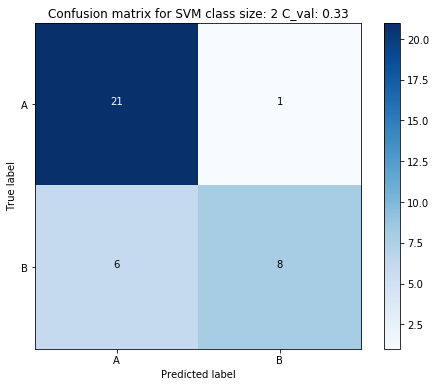

3
58.333333333333336
FileCount
0.25


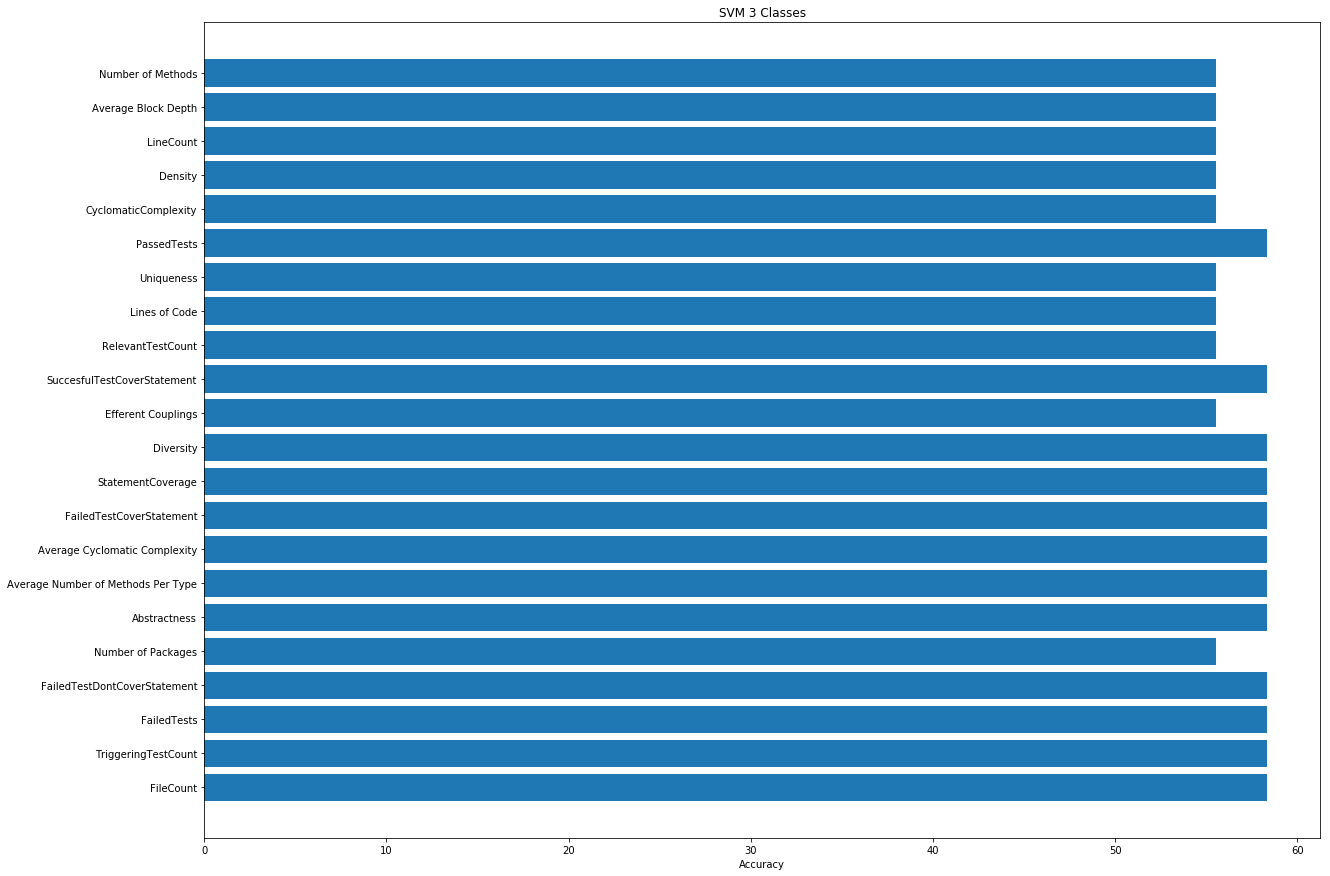

0.5833333333333334
[[18  0  0]
 [ 7  3  0]
 [ 7  1  0]]


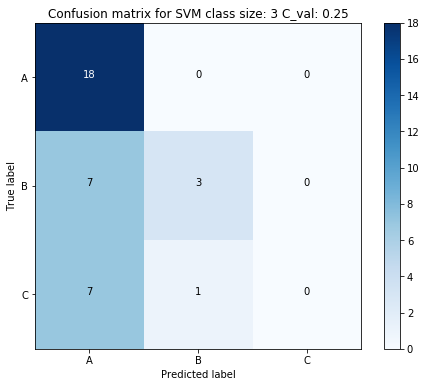

4
63.888888888888886
Density
0.44


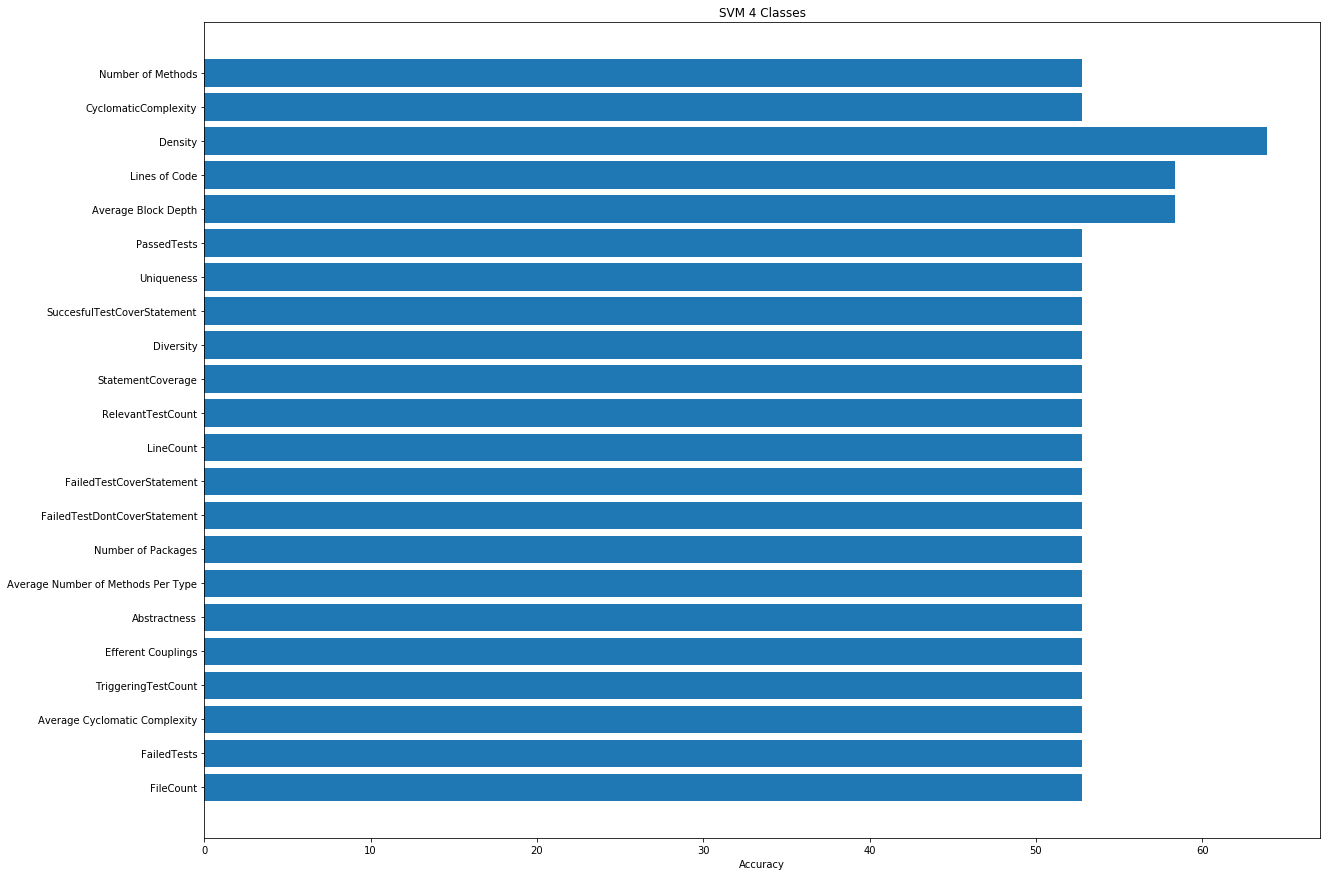

0.6388888888888888
[[13  0  0  0]
 [ 3  6  0  0]
 [ 2  4  4  0]
 [ 0  4  0  0]]


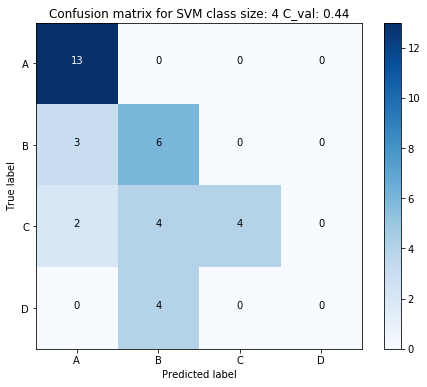

5
58.333333333333336
Diversity
0.33


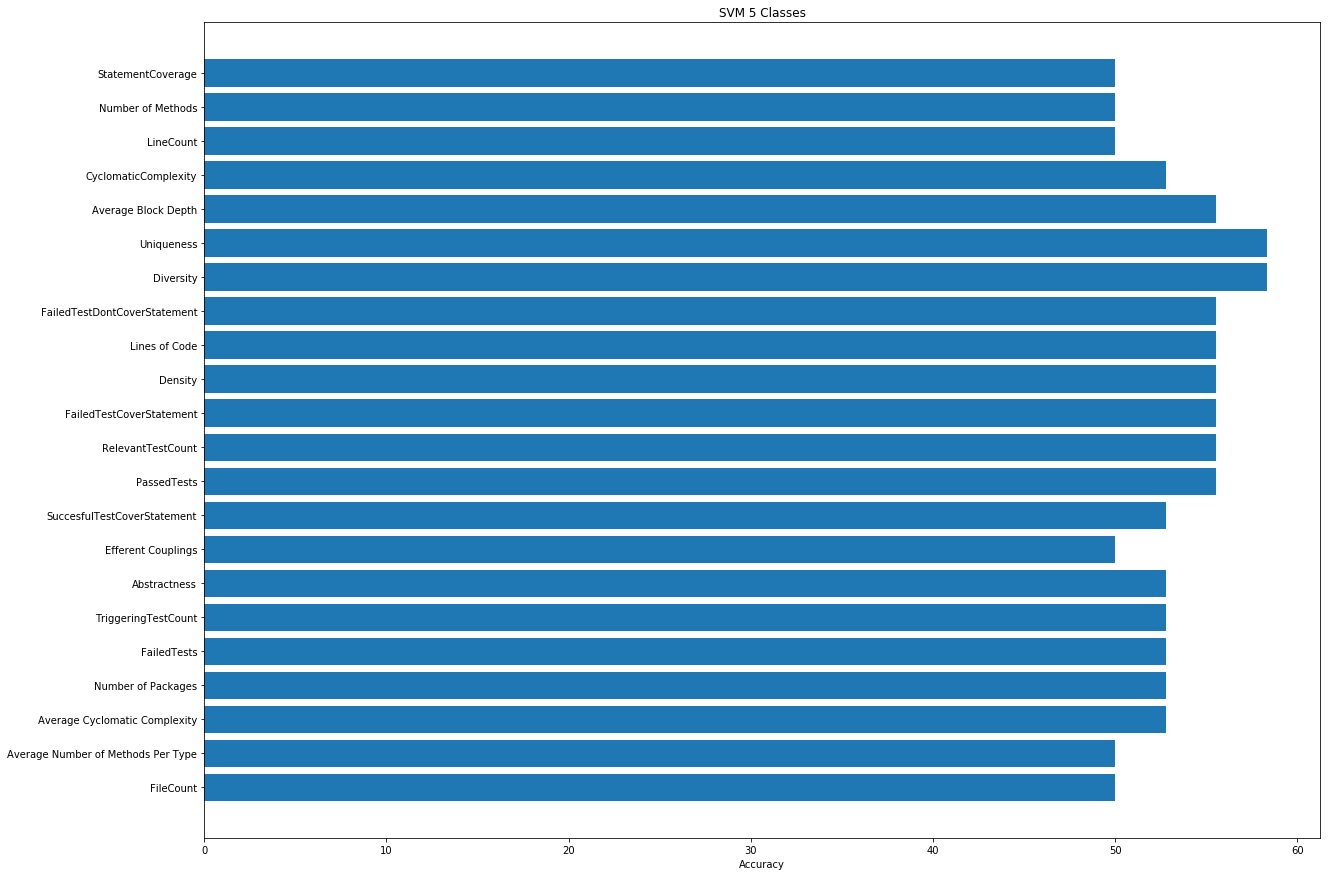

0.5833333333333334
[[13  0  0  0  0]
 [ 1  3  0  1  0]
 [ 3  1  0  3  0]
 [ 1  1  0  5  0]
 [ 0  3  0  1  0]]


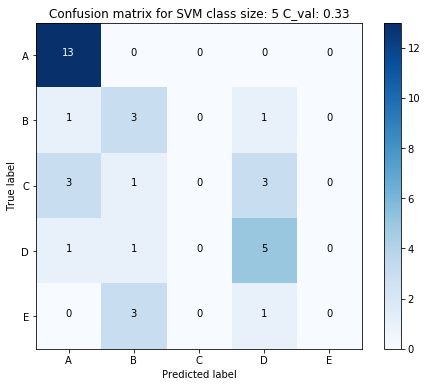

6
47.22222222222222
LineCount
0.44


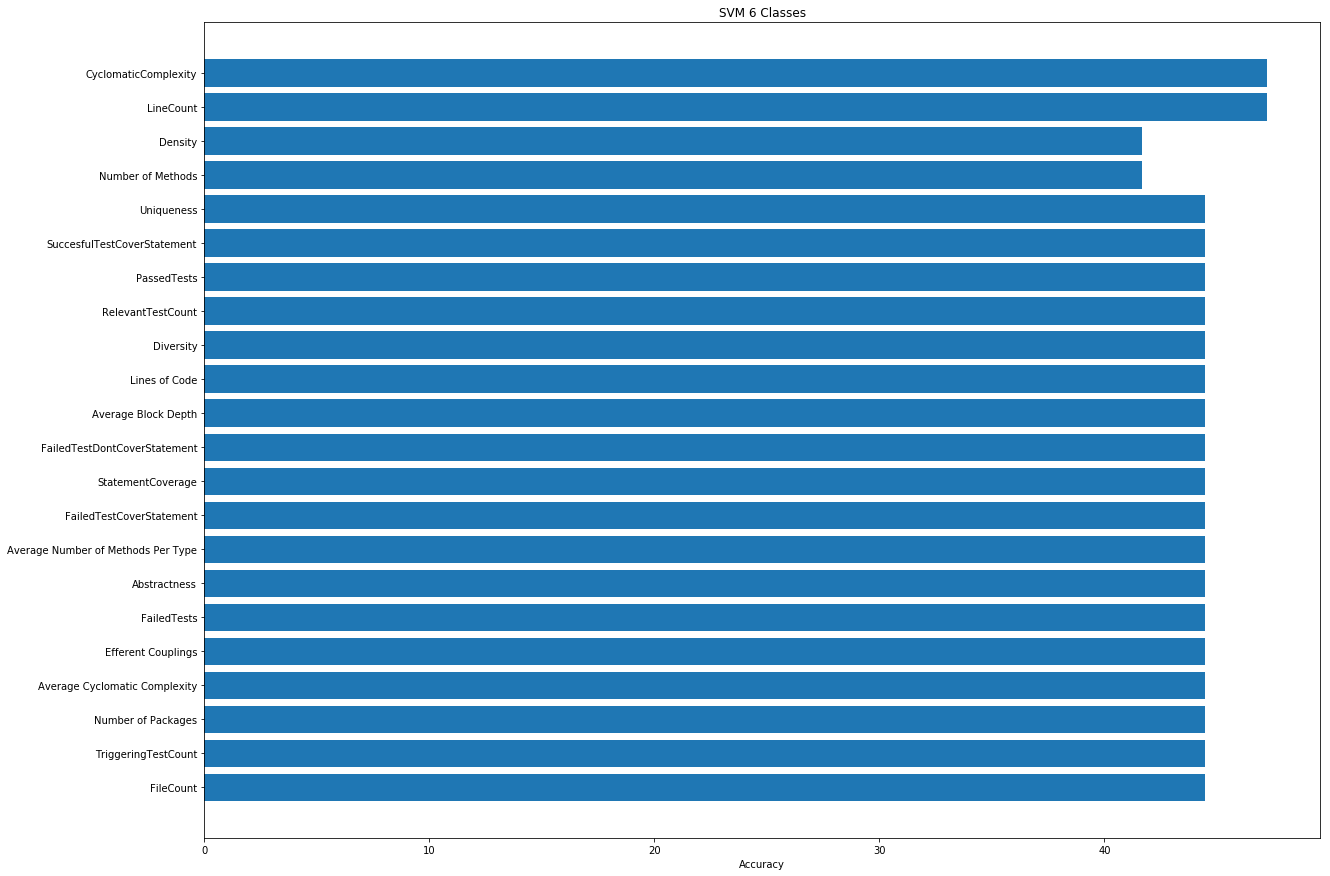

0.4722222222222222
[[12  0  0  0  0  0]
 [ 2  2  2  0  0  0]
 [ 2  0  2  0  0  0]
 [ 1  2  2  0  1  0]
 [ 0  0  4  0  1  0]
 [ 0  3  0  0  0  0]]


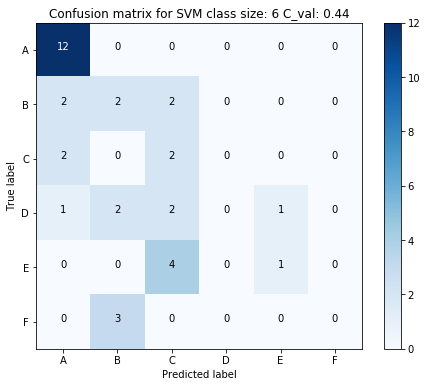

In [16]:
files = ['WithCyclomatic/SVM2.txt','WithCyclomatic/SVM3.txt', 
         'WithCyclomatic/SVM4.txt', 'WithCyclomatic/SVM5.txt', 'WithCyclomatic/SVM6.txt' ]


classes = [['A', 'B'],['A', 'B', 'C'], ['A', 'B', 'C', 'D'],['A', 'B', 'C', 'D','E'],['A', 'B', 'C', 'D','E','F']]

for i in range(len(files)):
    acc_list = list()
    metric_list = list()
    hiddenlayer_list = list()
    est_list = list()
    filename_split = files[i].split("/")
    class_val = filename_split[1][3:4]
    print(class_val)
    with open(files[i]) as file:


        for line in file: 
            if not line.strip(): continue       
            line = line.replace('\n','')
            splitted = line.split(":") 
            est = splitted[2]
            est2 = est.replace('Accuracy','')
            estimator = est2.strip()
            est_list.append(estimator)
            split_val = splitted[1][:-1]
            split_val2 = split_val.strip()
            metric_list.append(split_val2)
            acc_list.append(float(splitted[3])*100)
    #print(acc_list)  
    #print(metric_list)
    #print(est_list)
    max_acc = max(acc_list)
    print(max_acc)
    index = acc_list.index(max_acc)
    print(metric_list[index])
    print(est_list[index])

    plt.barh(np.arange(len(metric_list)), acc_list)
    plt.yticks(np.arange(len(metric_list)), metric_list)
    plt.xlabel('Accuracy')
    plt.title('SVM ' + str(class_val) + ' Classes')
    plt.show()

    csvName="chart_closure_lang_time_cyclomatic.csv"
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,int(class_val),"equallySliced")



    for i in range(0,index+1):

        df=df.drop(columns=metric_list[i])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)



    clf = SVC(C = float(est_list[index]), kernel='rbf', degree=3, )
    clf.fit(X_train.values, y_train)
    clf.fit(X_train.values, y_train)

    y_pred = clf.predict(X_test.values)
    accuracy=accuracy_score(y_true, y_pred)

    print(accuracy)

    cnf_matrix = confusion_matrix(y_true, y_pred)
    cmap = plt.get_cmap('Blues')
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    print(cnf_matrix)
    tick_marks = np.arange(len(classes[int(class_val)-2]))
    plt.xticks(tick_marks, classes[int(class_val)-2])
    plt.yticks(tick_marks, classes[int(class_val)-2])
    #plt.matshow(cnf_matrix)
    plt.title('Confusion matrix for SVM class size: ' +  str(class_val) +  ' C_val: '  + str(est_list[index]))
    thresh = cnf_matrix.max() / 2
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, format(cnf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Adaboost with Math without Cyclomatic Complexity

In [19]:
files = ['WithMath/adaboosttest2.txt','WithMath/adaboosttest3.txt', 
         'WithMath/adaboosttest4.txt', 'WithMath/adaboosttest5.txt', 'WithMath/adaboosttest6.txt' ]


classes = [['A', 'B'],['A', 'B', 'C'], ['A', 'B', 'C', 'D'],['A', 'B', 'C', 'D','E'],['A', 'B', 'C', 'D','E','F']]

for i in range(len(files)):
    acc_list = list()
    metric_list = list()
    hiddenlayer_list = list()
    est_list = list()
    filename_split = files[i].split("/")
    class_val = filename_split[1][12:13]
    with open(files[i]) as file:


        for line in file: 
            if not line.strip(): continue       
            line = line.replace('\n','')
            splitted = line.split(":") 
            est = splitted[2]
            est2 = est.replace('Accuracy','')
            estimator = est2.strip()
            est_list.append(estimator)
            split_val = splitted[1][:-9]
            split_val2 = split_val.strip()
            metric_list.append(split_val2)
            acc_list.append(float(splitted[3])*100)
    #print(acc_list)  
    #print(metric_list)
    max_acc = max(acc_list)
    print(max_acc)
    index = acc_list.index(max_acc)
    print(metric_list[index])
    print(est_list[index])

    plt.barh(np.arange(len(metric_list)), acc_list)
    plt.yticks(np.arange(len(metric_list)), metric_list)
    plt.xlabel('Accuracy')
    plt.title('Adaboost ' + str(class_val) + ' Classes')
    plt.show()

    csvName="fulldata_wo_cyclomatic.csv"
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,int(class_val),"equallySliced")



    for i in range(0,index+1):

        df=df.drop(columns=metric_list[i])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)



    clf = AdaBoostClassifier(n_estimators=int(est_list[index]))
    clf.fit(X_train.values, y_train)

    y_pred = clf.predict(X_test.values)
    accuracy=accuracy_score(y_true, y_pred)

    print(accuracy)

    cnf_matrix = confusion_matrix(y_true, y_pred)
    cmap = plt.get_cmap('Blues')
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    print(cnf_matrix)
    tick_marks = np.arange(len(classes[int(class_val)-2]))
    plt.xticks(tick_marks, classes[int(class_val)-2])
    plt.yticks(tick_marks, classes[int(class_val)-2])
    #plt.matshow(cnf_matrix)
    plt.title('Confusion matrix for AdaBoost class size ' + str(class_val) +  ' Estimator ' + str(est_list[index]))
    thresh = cnf_matrix.max() / 2
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, format(cnf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

IndexError: list index out of range

### ExtraTrees with Math without Cyclomatic Complexity

76.92307692307693
Average Block Depth
300


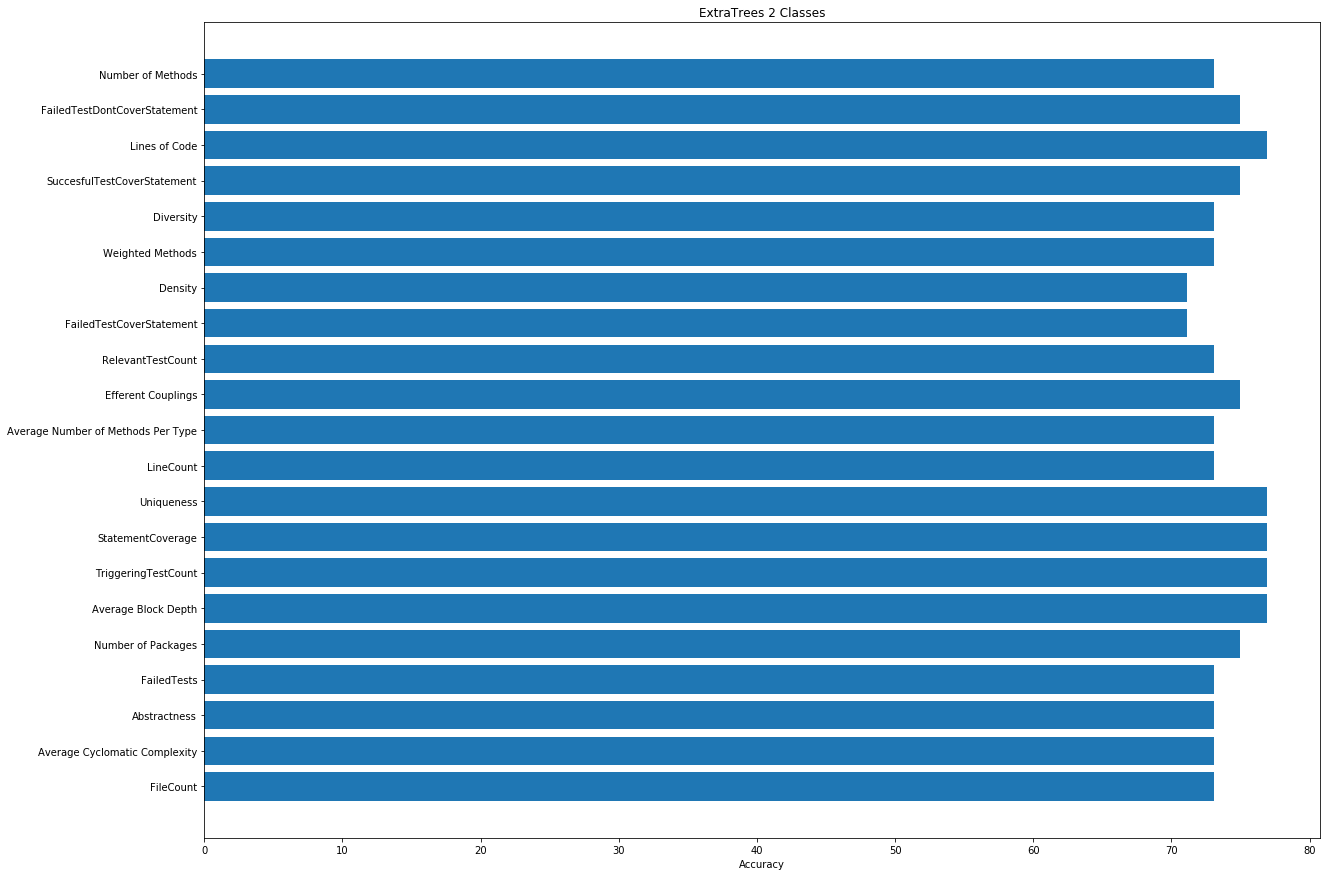

0.75
[[27  6]
 [ 7 12]]


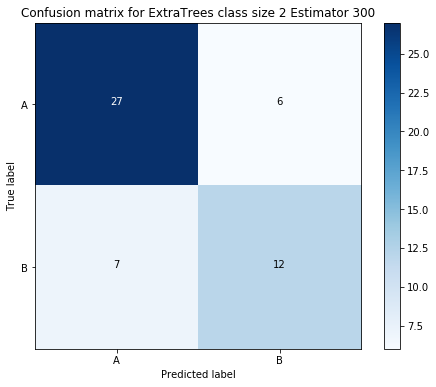

61.53846153846154
Average Number of Methods Per Type
1100


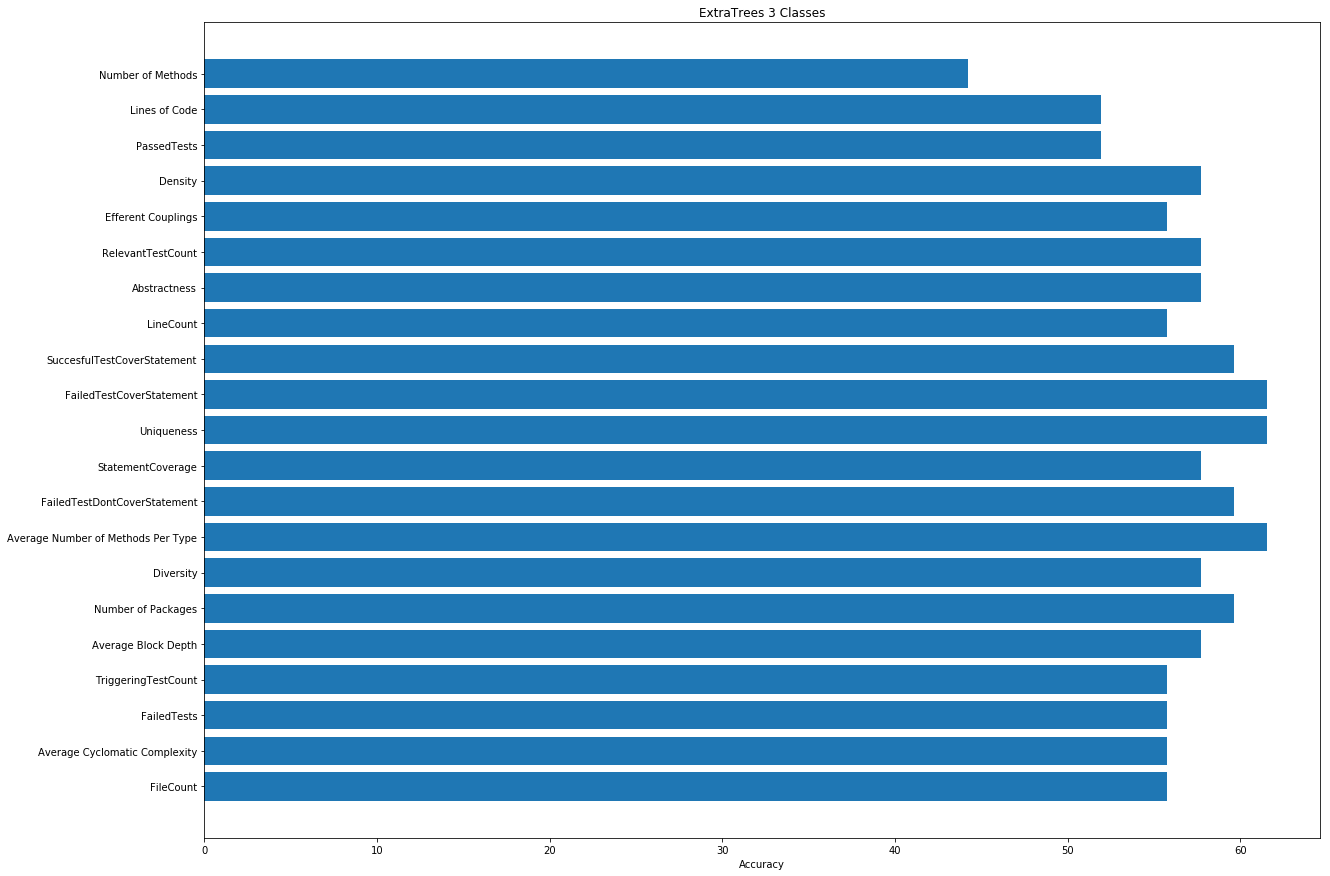

0.5769230769230769
[[18  4  1]
 [10  6  3]
 [ 2  2  6]]


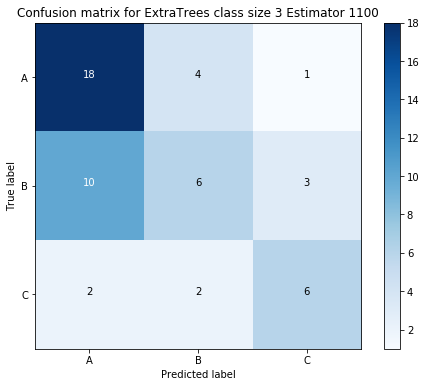

59.61538461538461
FailedTestDontCoverStatement
1100


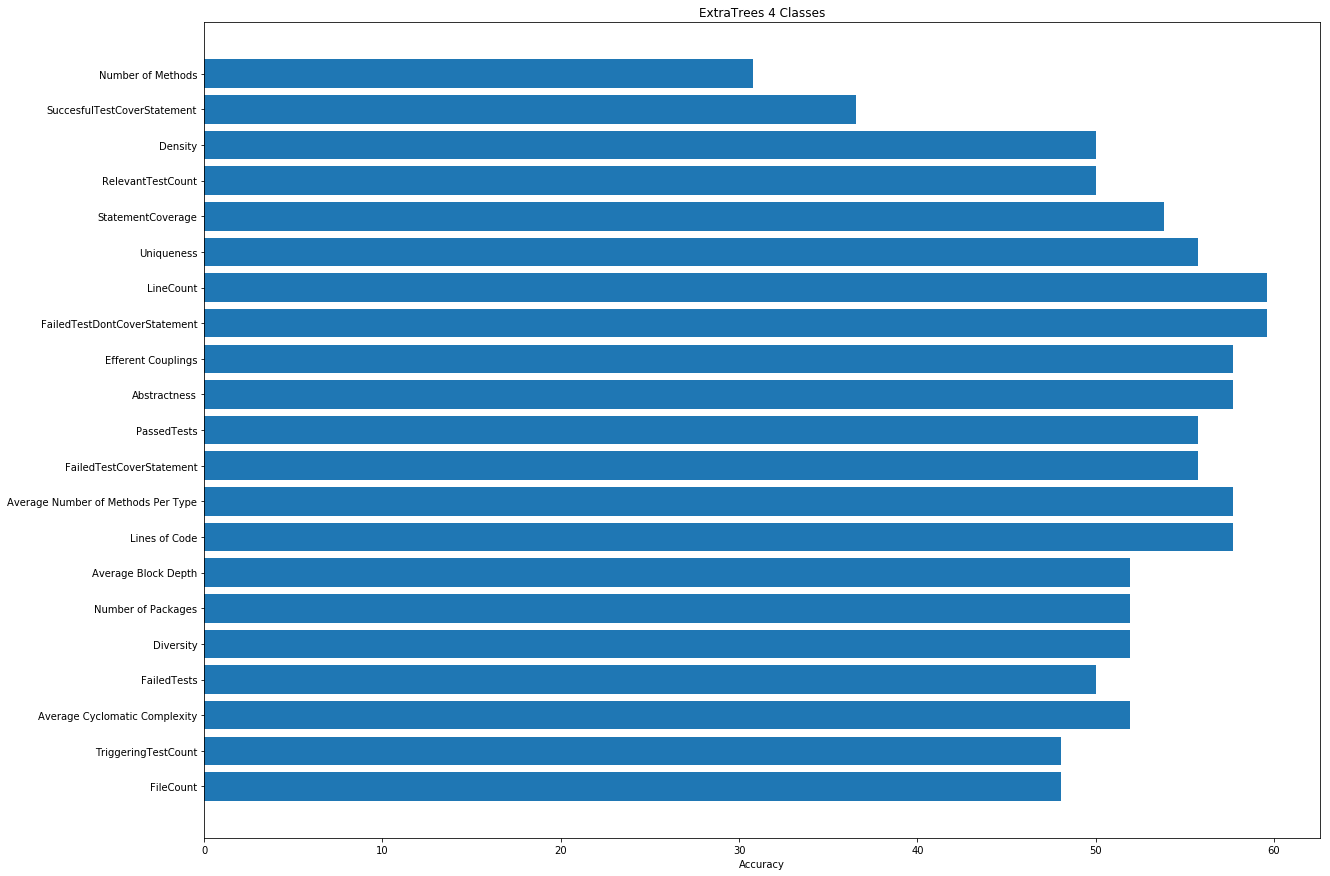

0.5769230769230769
[[15  2  0  0]
 [ 7  6  3  0]
 [ 4  1  5  1]
 [ 1  1  2  4]]


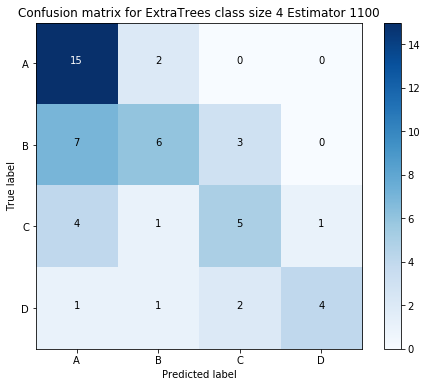

57.692307692307686
PassedTests
300


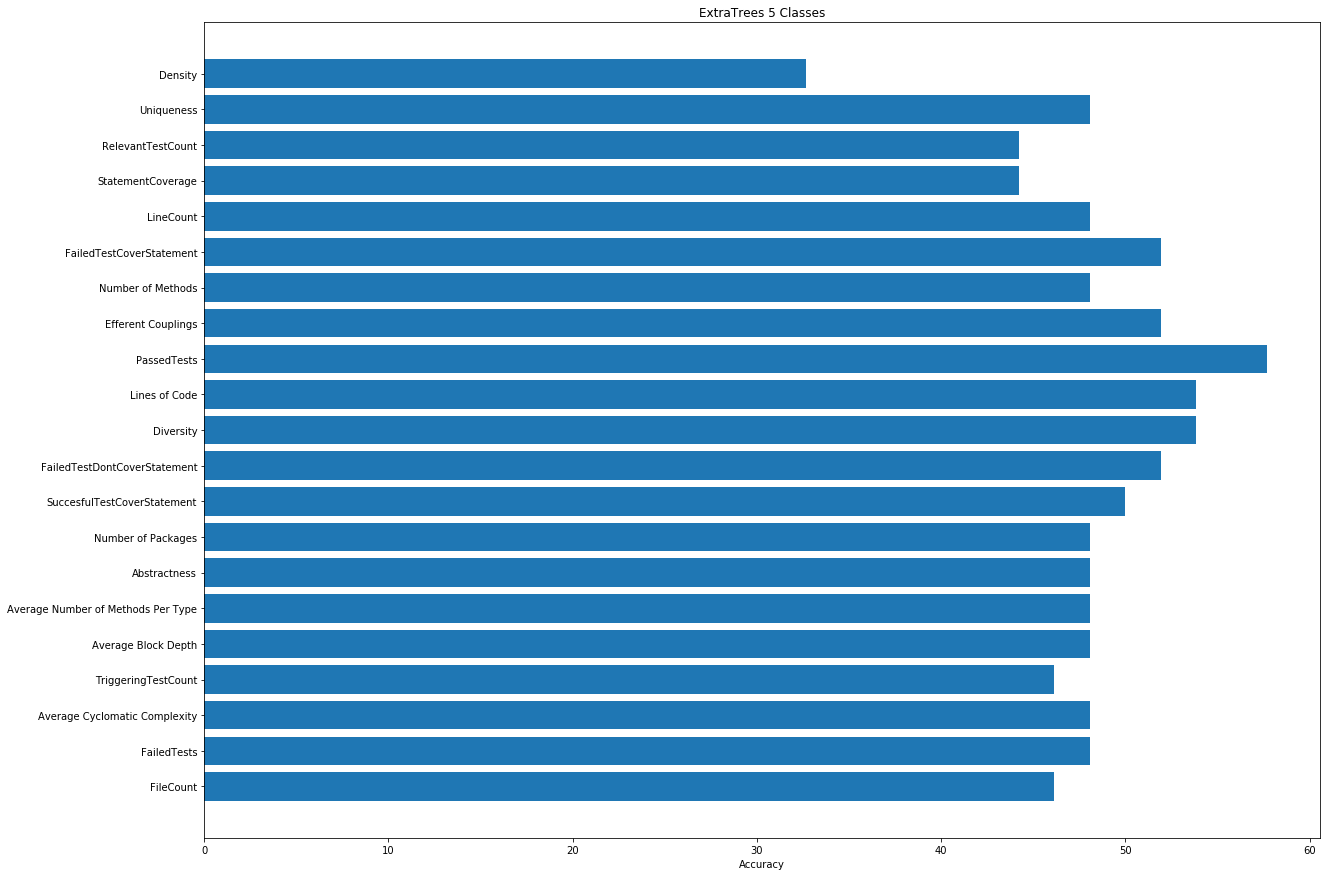

0.5
[[14  2  0  0  0]
 [ 4  5  2  1  0]
 [ 5  1  2  1  0]
 [ 1  1  3  1  1]
 [ 1  1  0  2  4]]


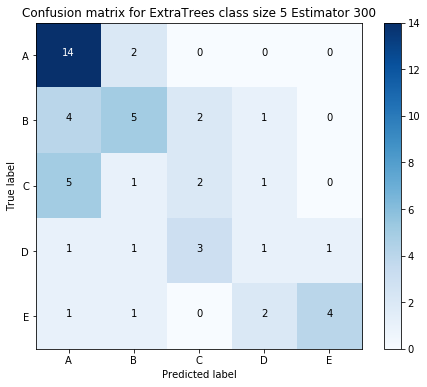

48.07692307692308
PassedTests
500


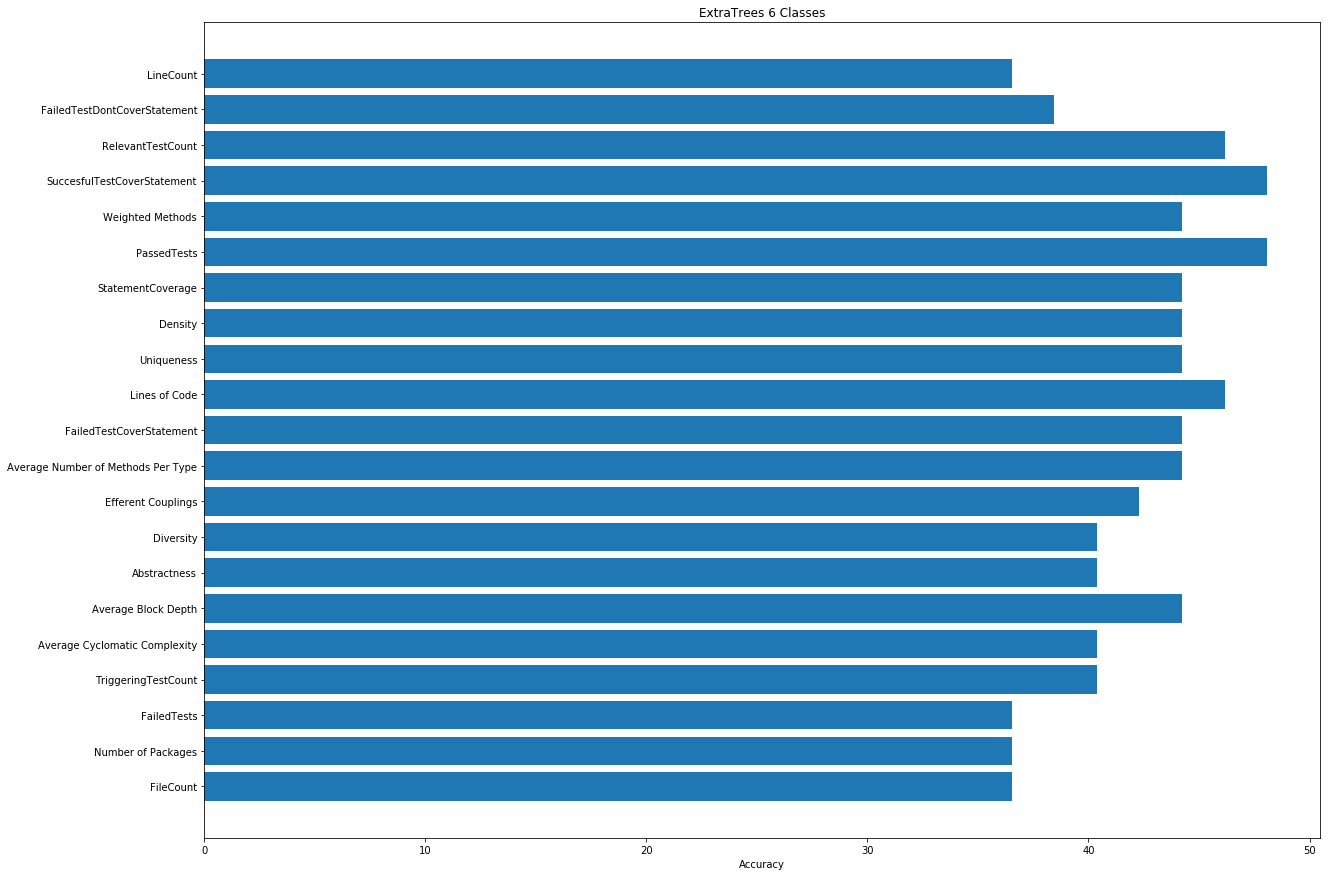

0.4423076923076923
[[12  3  0  0  0  0]
 [ 3  4  0  0  1  0]
 [ 5  1  3  1  0  0]
 [ 4  1  1  1  1  1]
 [ 0  0  0  1  2  0]
 [ 2  1  0  0  3  1]]


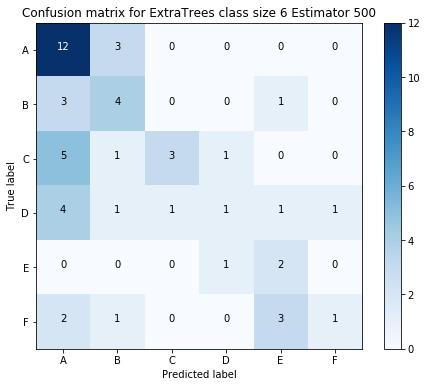

In [20]:


files = ['WithMath/extratreestest2.txt','WithMath/extratreestest3.txt', 
         'WithMath/extratreestest4.txt', 'WithMath/extratreestest5.txt', 'WithMath/extratreestest6.txt' ]


classes = [['A', 'B'],['A', 'B', 'C'], ['A', 'B', 'C', 'D'],['A', 'B', 'C', 'D','E'],['A', 'B', 'C', 'D','E','F']]

for i in range(len(files)):
    acc_list = list()
    metric_list = list()
    hiddenlayer_list = list()
    est_list = list()
    filename_split = files[i].split("/")
    class_val = filename_split[1][14:15]
    with open(files[i]) as file:

        for line in file: 
            if not line.strip(): continue       
            line = line.replace('\n','')
            splitted = line.split(":") 
            est = splitted[2]
            est2 = est.replace('Accuracy','')
            estimator = est2.strip()
            est_list.append(estimator)
            split_val = splitted[1].replace('Estimator', '')
            split_val2 = split_val.strip()
            metric_list.append(split_val2)
            acc_list.append(float(splitted[3])*100)
    #print(acc_list)  
    #print(metric_list)
    #print(est_list)
    max_acc = max(acc_list)
    print(max_acc)
    index = acc_list.index(max_acc)
    print(metric_list[index])
    print(est_list[index])

    plt.barh(np.arange(len(metric_list)), acc_list)
    plt.yticks(np.arange(len(metric_list)), metric_list)
    plt.xlabel('Accuracy')
    plt.title('ExtraTrees ' + str(class_val) + ' Classes')
    plt.show()

    csvName="fulldata_wo_cyclomatic.csv"
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,int(class_val),"equallySliced")



    for i in range(0,index+1):

        df=df.drop(columns=metric_list[i])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)


    clf = ExtraTreesClassifier(n_estimators=int(est_list[index]), criterion="gini", max_depth=None, bootstrap=True)
    clf.fit(X_train.values, y_train)
    y_pred = clf.predict(X_test.values)
    accuracy=accuracy_score(y_true, y_pred)

    print(accuracy)

    cnf_matrix = confusion_matrix(y_true, y_pred)
    cmap = plt.get_cmap('Blues')
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    print(cnf_matrix)
    tick_marks = np.arange(len(classes[int(class_val)-2]))
    plt.xticks(tick_marks, classes[int(class_val)-2])
    plt.yticks(tick_marks, classes[int(class_val)-2])
    #plt.matshow(cnf_matrix)
    plt.title('Confusion matrix for ExtraTrees class size ' + str(class_val) +  ' Estimator ' + str(est_list[index]))
    thresh = cnf_matrix.max() / 2
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, format(cnf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### SVM with Math without Cyclomatic Complexity

2
63.46153846153846
FileCount
0.01


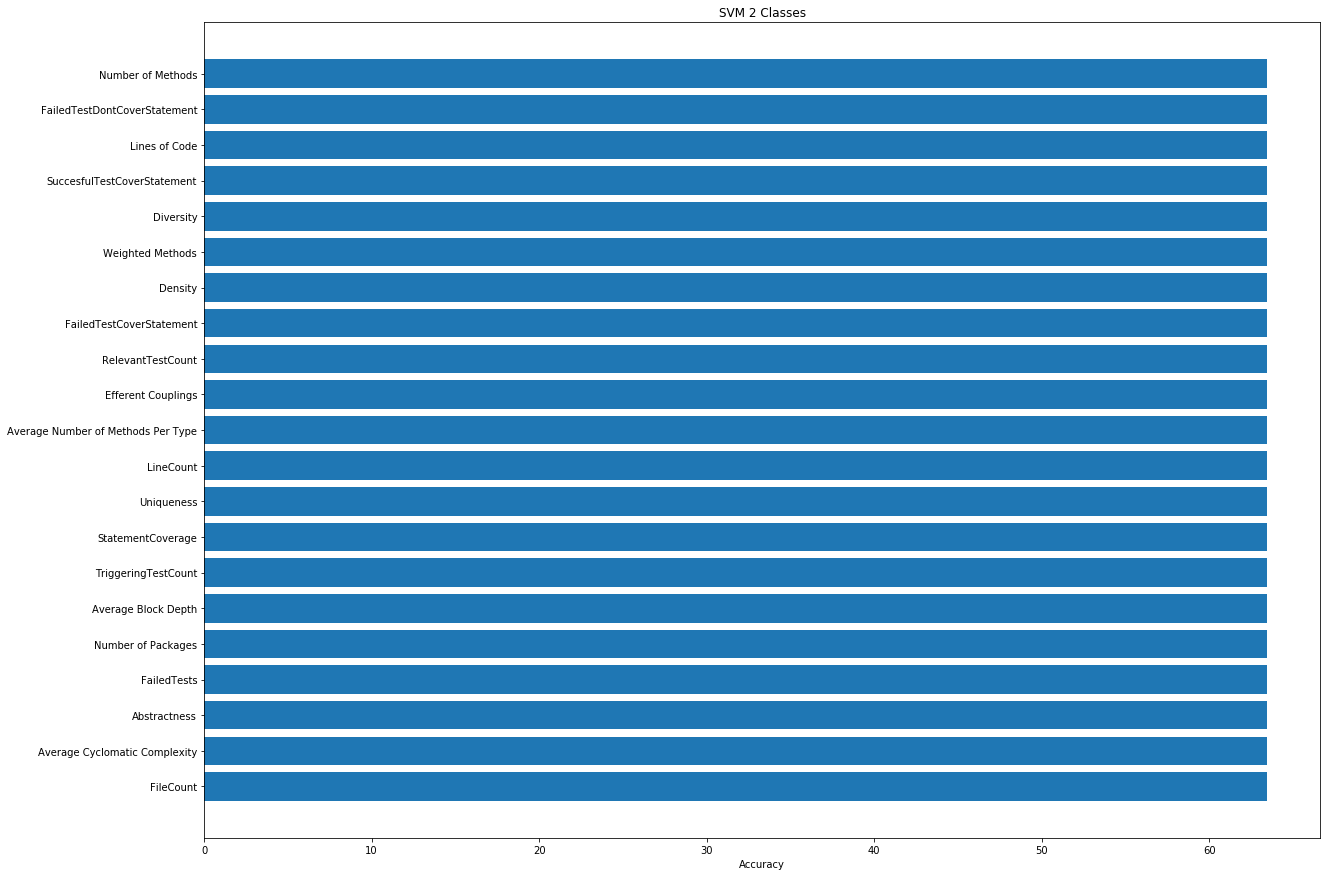

0.6346153846153846
[[33  0]
 [19  0]]


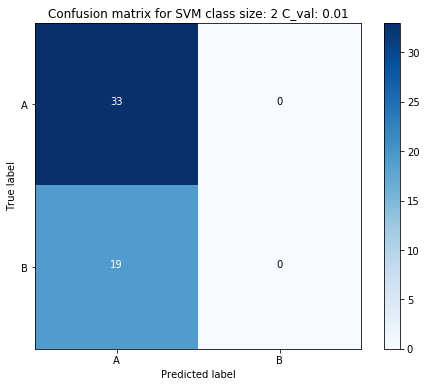

3
51.92307692307693
Lines of Code
0.49


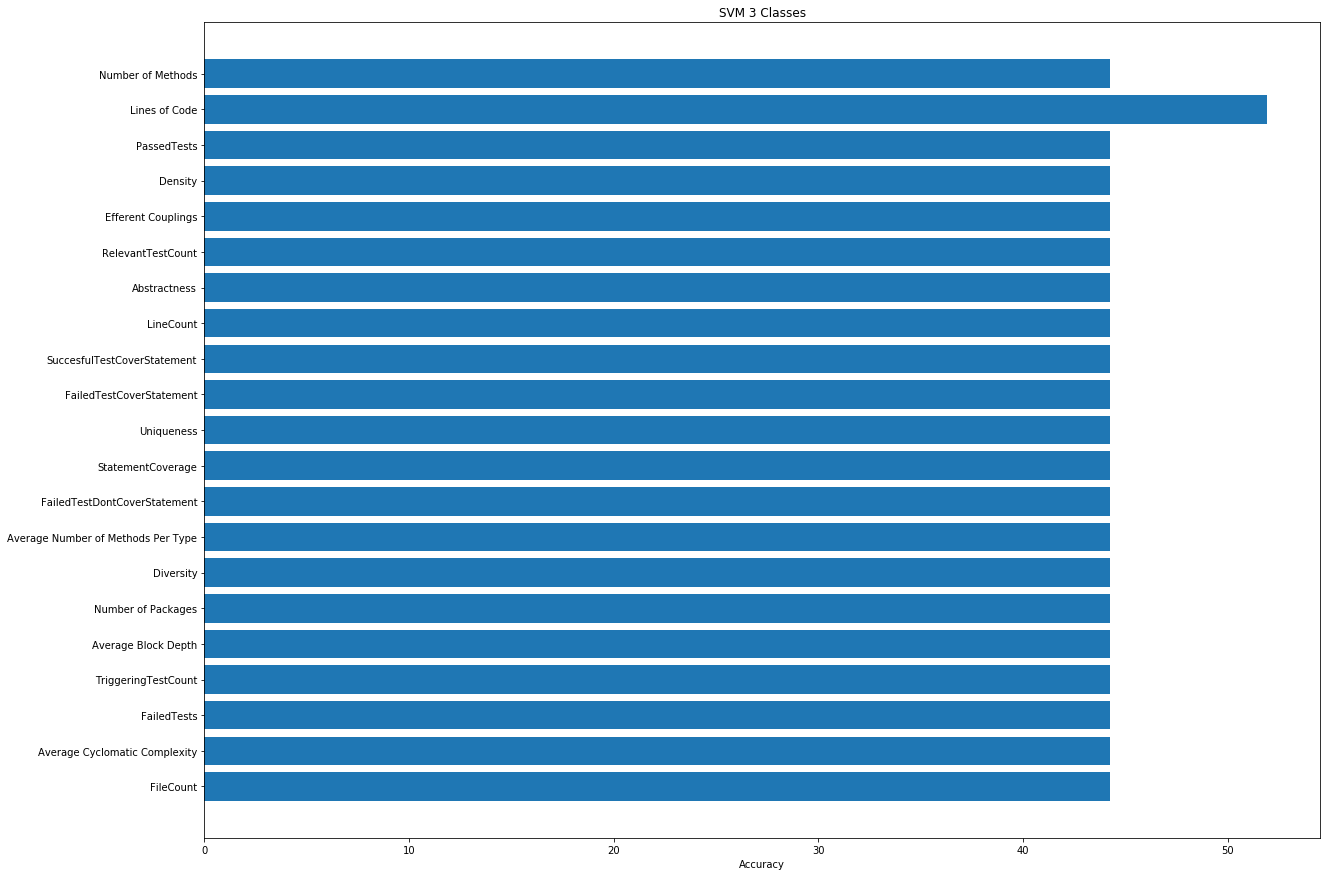

0.5192307692307693
[[20  3  0]
 [12  7  0]
 [ 5  5  0]]


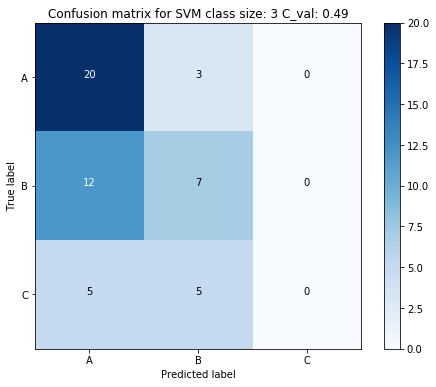

4
48.07692307692308
Density
0.5


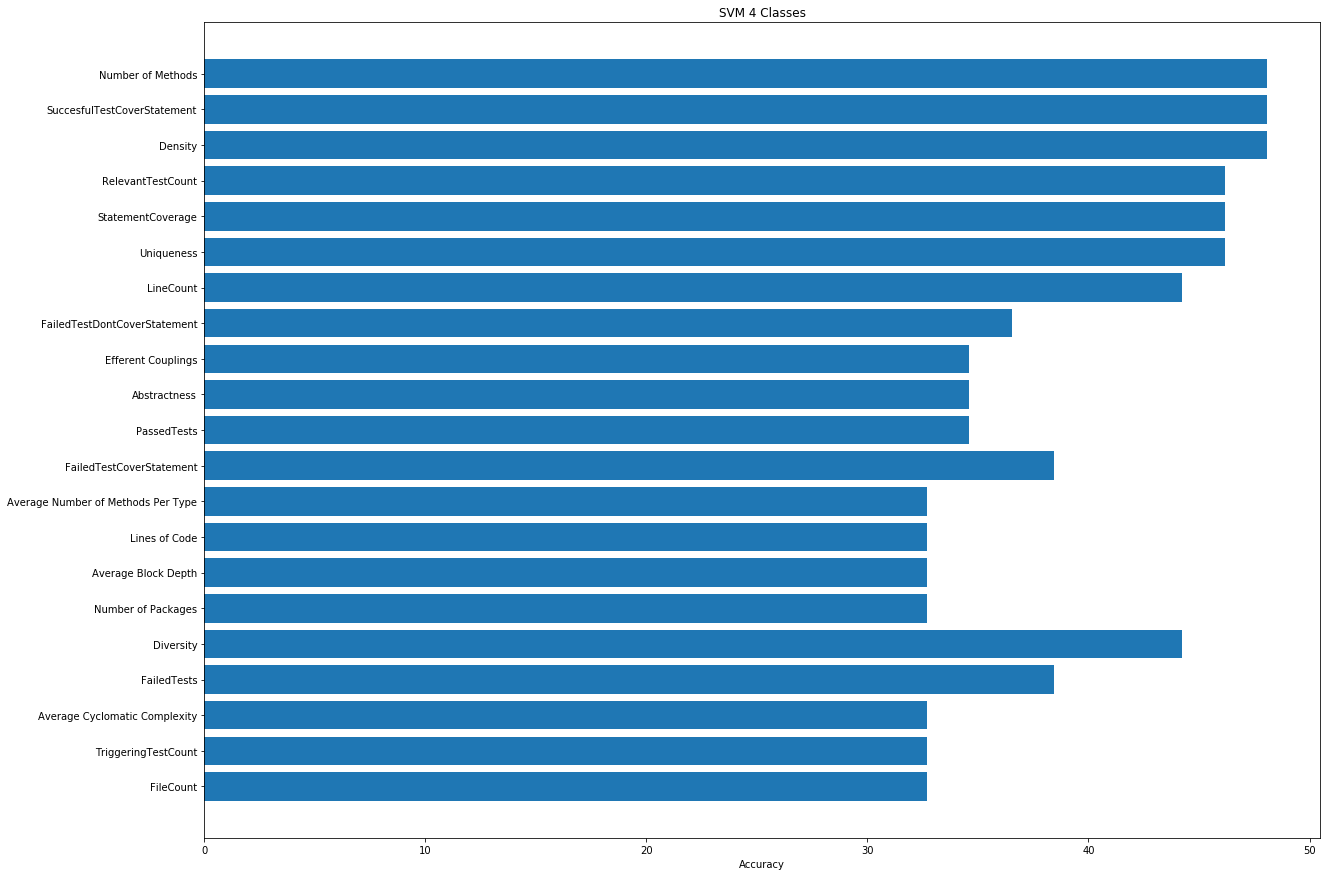

0.4807692307692308
[[16  1  0  0]
 [ 7  9  0  0]
 [ 5  6  0  0]
 [ 2  6  0  0]]


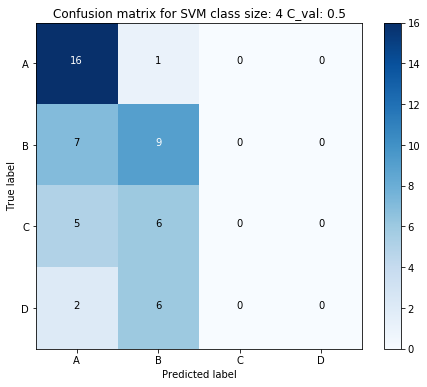

5
44.230769230769226
Density
0.46


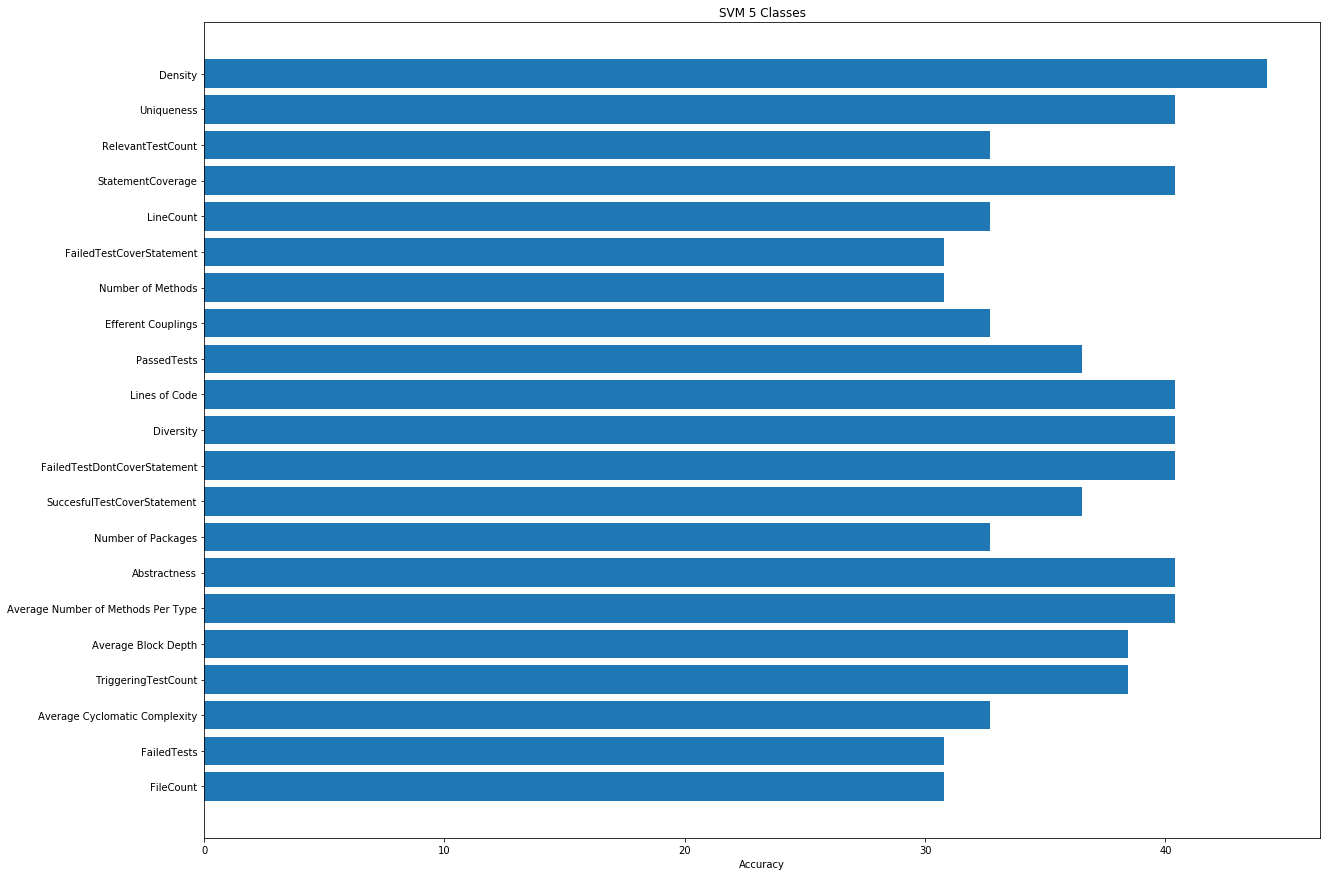

0.4423076923076923
[[15  0  0  1  0]
 [ 6  3  0  3  0]
 [ 5  3  0  1  0]
 [ 2  0  0  5  0]
 [ 2  4  0  2  0]]


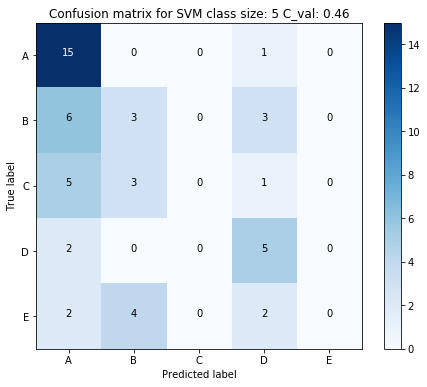

6
32.69230769230769
FailedTestDontCoverStatement
0.47000000000000003


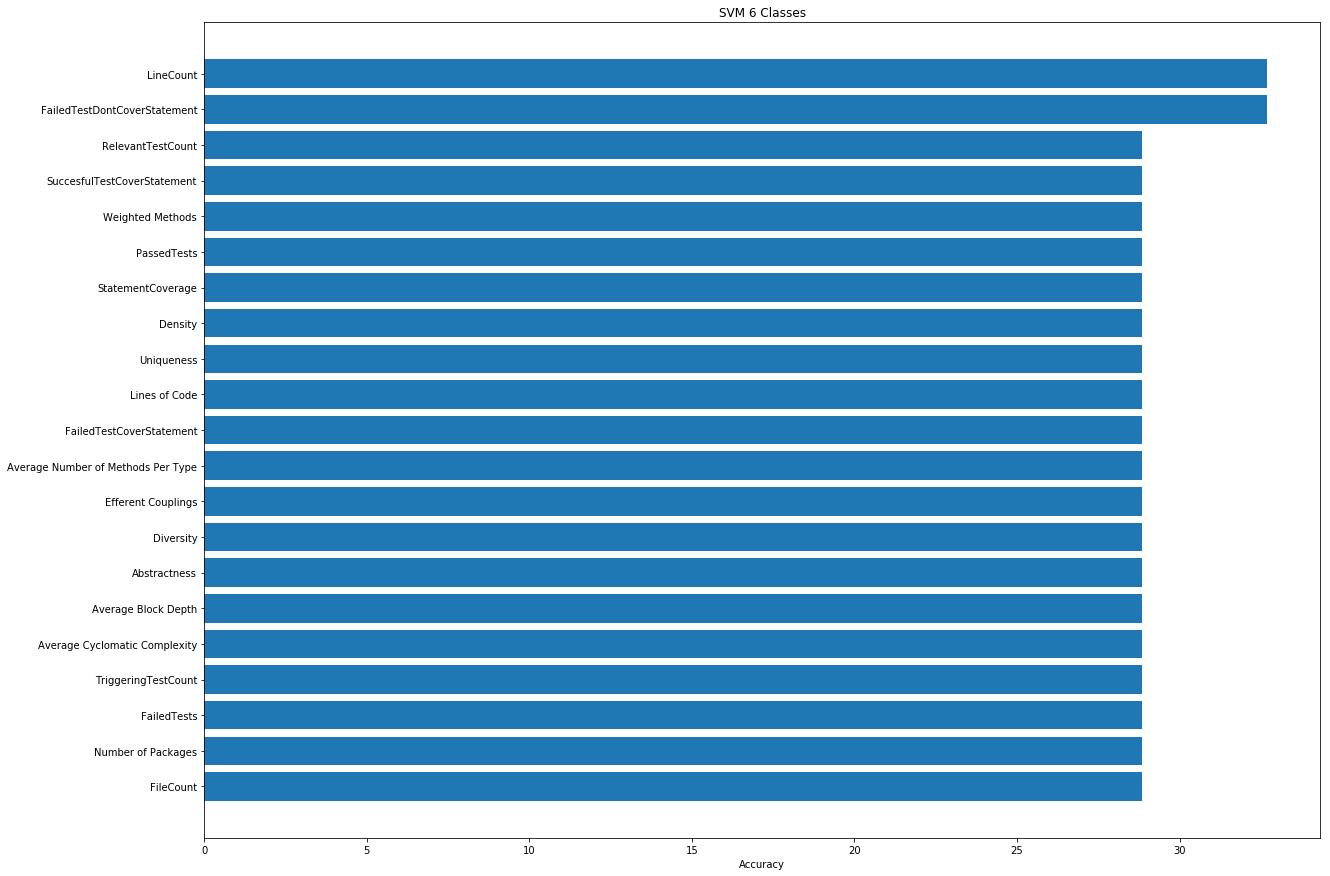

0.3269230769230769
[[14  1  0  0  0  0]
 [ 6  2  0  0  0  0]
 [ 9  1  0  0  0  0]
 [ 6  3  0  0  0  0]
 [ 2  0  0  0  1  0]
 [ 4  3  0  0  0  0]]


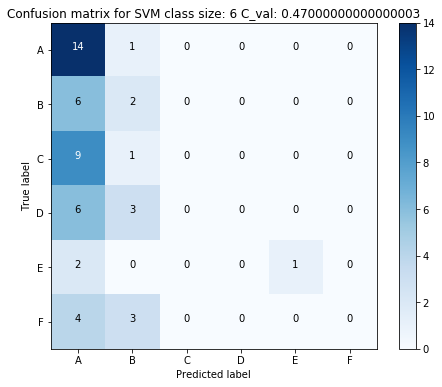

In [21]:
files = ['WithMath/SVM2.txt','WithMath/SVM3.txt', 
         'WithMath/SVM4.txt', 'WithMath/SVM5.txt', 'WithMath/SVM6.txt' ]


classes = [['A', 'B'],['A', 'B', 'C'], ['A', 'B', 'C', 'D'],['A', 'B', 'C', 'D','E'],['A', 'B', 'C', 'D','E','F']]

for i in range(len(files)):
    acc_list = list()
    metric_list = list()
    hiddenlayer_list = list()
    est_list = list()
    filename_split = files[i].split("/")
    class_val = filename_split[1][3:4]
    print(class_val)
    with open(files[i]) as file:


        for line in file: 
            if not line.strip(): continue       
            line = line.replace('\n','')
            splitted = line.split(":") 
            est = splitted[2]
            est2 = est.replace('Accuracy','')
            estimator = est2.strip()
            est_list.append(estimator)
            split_val = splitted[1][:-1]
            split_val2 = split_val.strip()
            metric_list.append(split_val2)
            acc_list.append(float(splitted[3])*100)
    #print(acc_list)  
    #print(metric_list)
    #print(est_list)
    max_acc = max(acc_list)
    print(max_acc)
    index = acc_list.index(max_acc)
    print(metric_list[index])
    print(est_list[index])

    plt.barh(np.arange(len(metric_list)), acc_list)
    plt.yticks(np.arange(len(metric_list)), metric_list)
    plt.xlabel('Accuracy')
    plt.title('SVM ' + str(class_val) + ' Classes')
    plt.show()

    csvName="fulldata_wo_cyclomatic.csv"
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,int(class_val),"equallySliced")



    for i in range(0,index+1):

        df=df.drop(columns=metric_list[i])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)



    clf = SVC(C = float(est_list[index]), kernel='rbf', degree=3, )
    clf.fit(X_train.values, y_train)
    clf.fit(X_train.values, y_train)

    y_pred = clf.predict(X_test.values)
    accuracy=accuracy_score(y_true, y_pred)

    print(accuracy)

    cnf_matrix = confusion_matrix(y_true, y_pred)
    cmap = plt.get_cmap('Blues')
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    print(cnf_matrix)
    tick_marks = np.arange(len(classes[int(class_val)-2]))
    plt.xticks(tick_marks, classes[int(class_val)-2])
    plt.yticks(tick_marks, classes[int(class_val)-2])
    #plt.matshow(cnf_matrix)
    plt.title('Confusion matrix for SVM class size: ' +  str(class_val) +  ' C_val: '  + str(est_list[index]))
    thresh = cnf_matrix.max() / 2
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, format(cnf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

### Neural Network 2 Layers with Math without Cyclomatic

c
84.61538461538461
LineCount


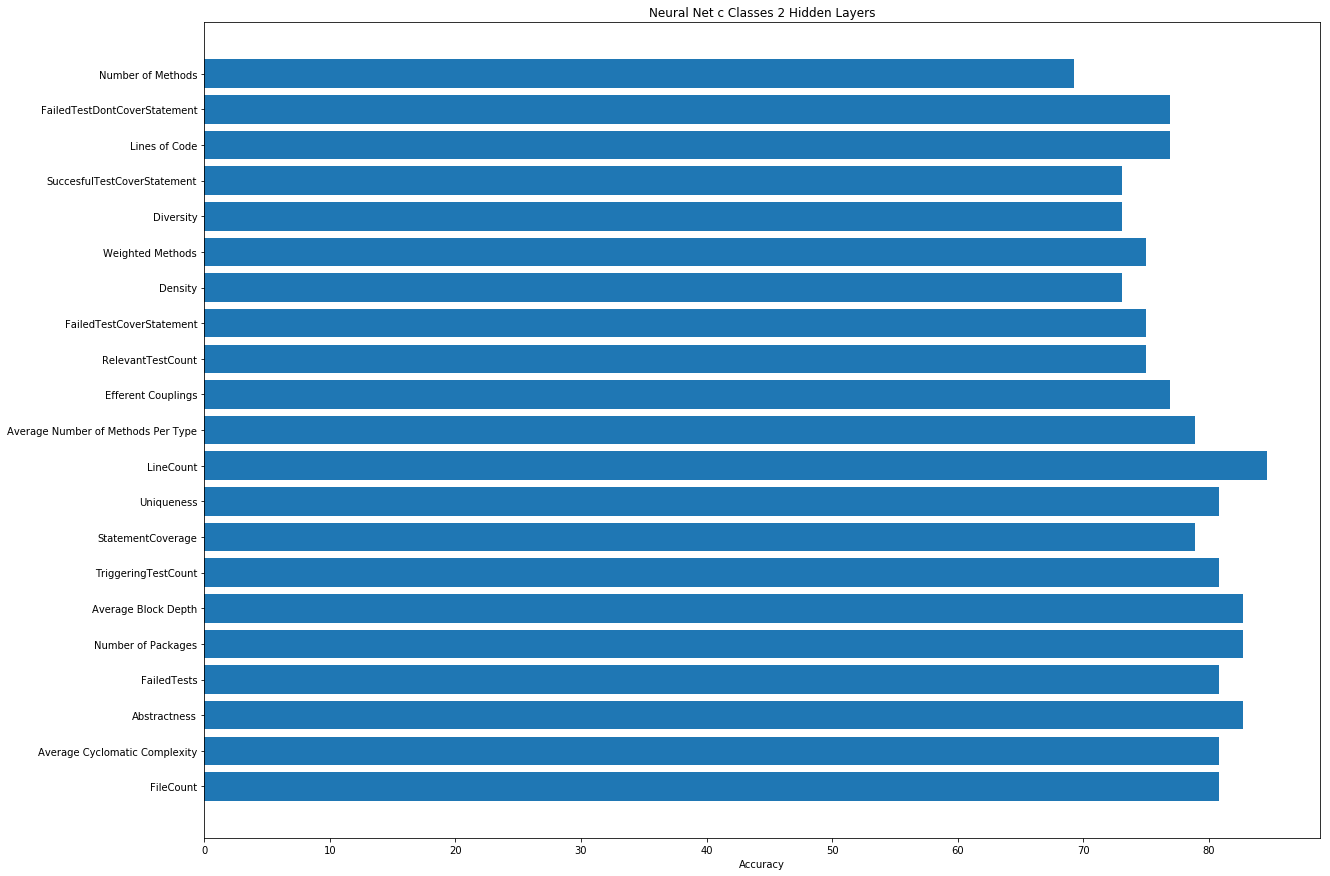

ValueError: invalid literal for int() with base 10: 'c'

In [17]:
files = ['WithMath/neuralnettest_equallySliced_2_wo_cyclomatic.txt', 'WithMath/neuralnettest_equallySliced_3_wo_cyclomatic.txt']


acc_list = list()
metric_list = list()

classes = [['A', 'B'],['A', 'B', 'C']]

for i in range(len(files)):
    acc_list = list()
    metric_list = list()
    hiddenlayer_list = list()
    est_list = list()
    alpha_list = list()
    filename_split = files[i].split("_")
    class_val = filename_split[4][0:1]
    print(class_val)
    with open(files[0]) as file:
        next(file)
        for line in file: 
            if not line.strip(): continue       
            line = line.replace('\n','')
            splitted = line.split(":") 
            #print(splitted)
            h_val = splitted[2]
            h_val_2 = h_val.replace('Alpha', '')
            hiddenlayer_list.append(h_val_2)
            alpha = splitted[3]
            alpha_2 = alpha.replace('Accuracy', '')
            alpha_3 = alpha_2.strip()
            alpha_list.append(alpha_3)
            split_val = splitted[1].replace('HH', '')
            split_val2 = split_val.strip()
            metric_list.append(split_val2)
            acc_list.append(float(splitted[4])*100)
    #print(acc_list)  
    # print(metric_list)
    #print(hiddenlayer_list)
    #print(alpha_list)
    max_acc = max(acc_list)
    print(max_acc)
    index = acc_list.index(max_acc)
    print(metric_list[index])


    plt.barh(np.arange(len(metric_list)), acc_list)
    plt.yticks(np.arange(len(metric_list)), metric_list)
    plt.xlabel('Accuracy')
    plt.title('Neural Net ' + str(class_val) + ' Classes 2 Hidden Layers')
    plt.show()

    csvName="fulldata_wo_cyclomatic.csv"
    df2 = pd.read_csv(csvName)
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)
    df=makeClassDataFrame(df2,int(class_val),"equallySliced")



    for i in range(0,index+1):

        df=df.drop(columns=metric_list[i])
        X = pd.DataFrame(df.iloc[:,:-1])
        X = (X - X.mean()) / (X.max() - X.min())
        y = pd.DataFrame(df.iloc[:,-1])
        y = pd.get_dummies(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
        ### convert one hot to numbers
        y_train = np.argmax(y_train.values, axis=-1)

        y_true = np.argmax(y_test.values, axis=-1)

    print(hiddenlayer_list[index])
    sp1 = hiddenlayer_list[index][:-1]
    sp2 = sp1[1:]
    sp = sp2.split(",")
    h1 = int(sp[0])
    h2 = int(sp[1])
    print(alpha_list[index])
    clf = MLPClassifier(solver='lbfgs', alpha=float(alpha_list[index]), hidden_layer_sizes=(h1,h2), random_state=1)
    clf.fit(X_train.values, y_train)
    y_pred = clf.predict(X_test.values)
    accuracy=accuracy_score(y_true, y_pred)

    print(accuracy)

    cnf_matrix = confusion_matrix(y_true, y_pred)
    cmap = plt.get_cmap('Blues')
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    print(cnf_matrix)
    tick_marks = np.arange(len(classes[int(class_val)-2]))
    plt.xticks(tick_marks, classes[int(class_val)-2])
    plt.yticks(tick_marks, classes[int(class_val)-2])
    #plt.matshow(cnf_matrix)
    plt.title('Confusion matrix for class size ' + str(class_val) + ' HiddenLayer =   (' +str(h1) + ',' + str(h2) +') LR: 1e-3 ')
    thresh = cnf_matrix.max() / 2
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, format(cnf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()




